In [4]:
# read the file and connect to google drive file
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
#import data RAM 3.00
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [6]:
#df = pd.read_csv("/content/drive/MyDrive/2022_04_28 Vivli_Atlas_Data_Antibiotics.csv", index_col='Unnamed: 0')
df = pd.read_csv("/content/drive/MyDrive/amr/data.csv")
df.set_index("Isolate Id", inplace=True)

<ipython-input-6-794ee94fdbae>:2: DtypeWarning: Columns (5,10,19,20,23,24,29,30,35,36,43,44,45,46,55,56,57,58,59,62,63,64,65,67,68,69,70,71,72,73,74,75,76,77,78,79,81,82,83,84,85,86,87,88,89,91,92,93,94,95,96,97,98,99,101,102,103,117,120,122,125) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/amr/data.csv")


In [7]:
df.head()

,Study,Species,Family,Country,State,Gender,Age Group,Speciality,Source,In / Out Patient,...,DHA,FOX,ACTMIR,KPC,OXA,NDM,IMP,VIM,SPM,GIM
Isolate Id,,,,,,,,,,,,,,,,,,,,,
1000000,TEST,Pseudomonas aeruginosa,Non-Enterobacteriaceae,France,NaN,Male,85 and Over,Emergency Room,Urine,None Given,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000001,TEST,Pseudomonas aeruginosa,Non-Enterobacteriaceae,France,NaN,Female,13 to 18 Years,Emergency Room,Ear,None Given,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000002,TEST,Pseudomonas aeruginosa,Non-Enterobacteriaceae,France,NaN,Female,65 to 84 Years,Nursing Home / Rehab,Urine,None Given,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000003,TEST,Pseudomonas aeruginosa,Non-Enterobacteriaceae,France,NaN,Male,19 to 64 Years,Medicine General,Skin,None Given,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000004,TEST,Serratia marcescens,Enterobacteriaceae,France,NaN,Male,19 to 64 Years,Medicine General,Blood,None Given,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Select rows based on values in a column
selected_data = df[df['Study'] == 'Atlas']


In [9]:
selected_data.shape

(224867, 125)

In [10]:
selected_data.isna().sum()

Study           0
Species         0
Family          0
Country         0
State      201854
            ...  
NDM        203927
IMP        203927
VIM        203927
SPM        203927
GIM        203927
Length: 125, dtype: int64

In [11]:
# Drop columns with complete missingness
df_dropped = selected_data.dropna(axis=1, how='all')

In [12]:
df_dropped.shape

(224867, 101)

In [13]:
df_dropped.isna().sum()

Study           0
Species         0
Family          0
Country         0
State      201854
            ...  
NDM        203927
IMP        203927
VIM        203927
SPM        203927
GIM        203927
Length: 101, dtype: int64

In [14]:
df_dropped.columns

Index(['Study', 'Species', 'Family', 'Country', 'State', 'Gender', 'Age Group',
       'Speciality', 'Source', 'In / Out Patient',
       ...
       'DHA', 'FOX', 'ACTMIR', 'KPC', 'OXA', 'NDM', 'IMP', 'VIM', 'SPM',
       'GIM'],
      dtype='object', length=101)

In [15]:
# Drop columns by specifying their names
columns_to_drop = ['Aztreonam avibactam', 'Cefoperazone sulbactam']
df_dropped = df_dropped.drop(columns=columns_to_drop)


In [16]:
df_dropped.columns

Index(['Study', 'Species', 'Family', 'Country', 'State', 'Gender', 'Age Group',
       'Speciality', 'Source', 'In / Out Patient', 'Year', 'Phenotype',
       'Amikacin', 'Amikacin_I', 'Amoxycillin clavulanate',
       'Amoxycillin clavulanate_I', 'Ampicillin', 'Ampicillin_I',
       'Azithromycin', 'Azithromycin_I', 'Cefepime', 'Cefepime_I', 'Cefoxitin',
       'Cefoxitin_I', 'Ceftazidime', 'Ceftazidime_I', 'Ceftriaxone',
       'Ceftriaxone_I', 'Clindamycin', 'Clindamycin_I', 'Erythromycin',
       'Erythromycin_I', 'Imipenem', 'Imipenem_I', 'Levofloxacin',
       'Levofloxacin_I', 'Linezolid', 'Linezolid_I', 'Meropenem',
       'Meropenem_I', 'Metronidazole', 'Metronidazole_I', 'Penicillin',
       'Penicillin_I', 'Piperacillin tazobactam', 'Piperacillin tazobactam_I',
       'Tigecycline', 'Tigecycline_I', 'Vancomycin', 'Vancomycin_I',
       'Ampicillin sulbactam', 'Ampicillin sulbactam_I', 'Aztreonam',
       'Aztreonam_I', 'Ceftaroline', 'Ceftaroline_I', 'Ceftazidime avibactam',

In [17]:
! pip install pycountry_convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 55.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.7/228.7 kB 20.8 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=6ff9c2eaf960f0a99c839c988b7aedc192390a1151101c91c7b5383d827131d2
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [18]:
# Get continents
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

# Function to get continent from country name
def get_continent(country_name):
    try:
        # Convert country name to country code (alpha-2)
        if  country_name=="Korea, South":
          country_code = country_name_to_country_alpha2("South Korea")
          continent_code = country_alpha2_to_continent_code(country_code)
        else:
          # Convert country code to continent code
          country_code = country_name_to_country_alpha2(country_name)
         # Convert country code to continent code
          continent_code = country_alpha2_to_continent_code(country_code)
        return continent_code
    except:

        return 'Unknown'

# Add a new column for 'Continent' to the DataFrame
df_dropped['Continent'] = df_dropped['Country'].apply(get_continent)
df_dropped["Country"].isna().sum()

0

In [19]:
df_dropped["Continent"].unique()

array(['EU', 'NA', 'AS', 'SA', 'AF', 'OC'], dtype=object)

In [20]:
important_data_continent = df_dropped.drop(columns=["Study","Species","Age Group",'In / Out Patient','Phenotype','Year',"State","Family","Country","Gender","Speciality","Source"])

In [97]:
important_data_age = df_dropped.drop(columns=["Study","Species","Country",'In / Out Patient','Phenotype','Year',"State","Family","Gender","Speciality","Source"])

In [98]:
! pip install prince

In [22]:
import prince
def KNN_clustering(data_input,column):
  # Calculate the percentage of missing values in each column
  missing_percentages = data_input.isnull().mean() * 100

  # Identify columns with more than 40% missingness
  columns_to_drop = missing_percentages[missing_percentages > 40].index

  # Drop the identified columns
  df_dropped = data_input.drop(columns=columns_to_drop)
  imputed_data = pd.get_dummies(df_dropped)
  print(imputed_data.columns)
  #Reduce Dimentionality
  mca = prince.MCA()
  mca.fit(imputed_data)
  count=1
  # Analyze eigenvalues and cumulative explained variance
  eigenvalues = mca.eigenvalues_
  total_variance = sum(eigenvalues)
  explained_variance_ratio = eigenvalues / total_variance
  cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

  # Determine the number of components for at least 90% cumulative explained variance
  num_components_to_retain = np.argmax(cumulative_variance_ratio >= 0.9) + 1

  # Create new MCA object with the desired number of components
  reduced_mca = prince.MCA(n_components=num_components_to_retain)

  # Fit the new MCA object to your data
  reduced_mca.fit(imputed_data)

  # Transform your data to obtain the reduced-dimensional representation
  reduced_data = reduced_mca.transform(imputed_data)
  # save to csv
  reduced_data.to_csv(f"/content/drive/MyDrive/amr/{column}.csv")
  reduced_data
  # clustering
  # Y_sklearn = reduced_mca.fit_transform(reduced_data)
  kmeans = KMeans(n_clusters= 3, max_iter=600, algorithm = 'auto')
  kmeans
  %time fitted = kmeans.fit(reduced_data)
  #  'prediction' contains the cluster labels assigned by KMeans
  prediction = kmeans.predict(reduced_data)
  # Clustering
  # Get unique cluster labels
  unique_labels = set(prediction)

  # Plot the scatter plot of the reduced data with cluster assignments
  plt.scatter(reduced_data.values[:, 0], reduced_data.values[:, 1], c=prediction, s=50, cmap='viridis')

  # Clustering
  # Add one label for each cluster
  for label in unique_labels:
      # Find the first index of the cluster label
      index = prediction.tolist().index(label)
      # Add the label as a text annotation at the corresponding data point
      plt.text(reduced_data.values[index, 0], reduced_data.values[index, 1], str(label), ha='center', va='center')

  # Plot the cluster centers
  centers2 = kmeans.cluster_centers_
  plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=300, alpha=0.6)

  # Remove the duplicate legend entries
  plt.legend().remove()
  # Save the figure to a file
  plt.savefig(f"/content/drive/MyDrive/amr/{column}.png")

  # Show the plot
  plt.show()

  # Create a new DataFrame with the original data and cluster labels
  data_with_clusters = pd.DataFrame(data=data_input, columns=data_input.columns)
  data_with_clusters['Cluster'] = prediction

  # Group the data by the provided column
  grouped_data = data_with_clusters.groupby(column)

  # Return a dictionary of dataframes, with each dataframe representing a group
  grouped_data_dict = {}
  for group, group_data in grouped_data:
      # Create a new DataFrame with the one-hot encoded columns and cluster labels for the group
      group_data_with_columns = pd.get_dummies(group_data)
      grouped_data_dict[group] = group_data_with_columns

  return grouped_data_dict



In [23]:
# import prince

# def KNN_clustering(data_input, column):
#     # Calculate the percentage of missing values in each column
#     missing_percentages = data_input.isnull().mean() * 100

#     # Identify columns with more than 40% missingness
#     columns_to_drop = missing_percentages[missing_percentages > 40].index

#     # Drop the identified columns
#     df_dropped = data_input.drop(columns=columns_to_drop)
#     imputed_data = pd.get_dummies(df_dropped)

#     # Reduce Dimensionality
#     mca = prince.MCA()
#     mca.fit(imputed_data)

#     # Analyze eigenvalues and cumulative explained variance
#     eigenvalues = mca.eigenvalues_
#     total_variance = sum(eigenvalues)
#     explained_variance_ratio = eigenvalues / total_variance
#     cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

#     # Determine the number of components for at least 90% cumulative explained variance
#     num_components_to_retain = np.argmax(cumulative_variance_ratio >= 0.9) + 1

#     # Create new MCA object with the desired number of components
#     reduced_mca = prince.MCA(n_components=num_components_to_retain)

#     # Fit the new MCA object to your data
#     reduced_mca.fit(imputed_data)

#     # Transform your data to obtain the reduced-dimensional representation
#     reduced_data = reduced_mca.transform(imputed_data)

#     # Perform clustering
#     kmeans = KMeans(n_clusters=3, max_iter=600, algorithm='auto')
#     fitted = kmeans.fit(reduced_data)
#     prediction = kmeans.predict(reduced_data)

#     # Create a new DataFrame with the original data and cluster labels
#     data_with_clusters = pd.DataFrame(data=data_input, columns=data_input.columns)
#     data_with_clusters['Cluster'] = prediction

#     # Group the data by the provided column
#     grouped_data = data_with_clusters.groupby(column)

#     # Return a dictionary of dataframes, with each dataframe representing a group
#     grouped_data_dict = {}
#     for group, group_data in grouped_data:
#         # Create a new DataFrame with the one-hot encoded columns and cluster labels for the group
#         group_data_with_columns = pd.get_dummies(group_data)
#         grouped_data_dict[group] = group_data_with_columns

#     return grouped_data_dict


In [24]:
# one hot encode every continent


In [25]:
important_data_continent.columns[0]

'Amikacin'

Index(['Amikacin_0.5', 'Amikacin_1', 'Amikacin_16', 'Amikacin_2',
       'Amikacin_32', 'Amikacin_4', 'Amikacin_64', 'Amikacin_8',
       'Amikacin_<=0.25', 'Amikacin_>64',
       ...
       'Trimethoprim sulfa_>2', 'Trimethoprim sulfa_>32',
       'Trimethoprim sulfa_I_Resistant', 'Trimethoprim sulfa_I_Susceptible',
       'Continent_AF', 'Continent_AS', 'Continent_EU', 'Continent_NA',
       'Continent_OC', 'Continent_SA'],
      dtype='object', length=300)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


CPU times: user 1.77 s, sys: 813 ms, total: 2.59 s
Wall time: 1.37 s


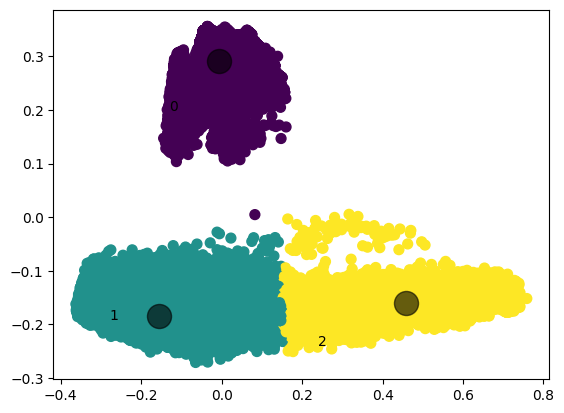

In [26]:
df=KNN_clustering(important_data_continent,"Continent")

In [99]:
df=KNN_clustering(important_data_continent,"Age Group")
#

Index(['Cluster', 'Amikacin_0.5', 'Amikacin_1', 'Amikacin_16', 'Amikacin_2',
       'Amikacin_32', 'Amikacin_4', 'Amikacin_64', 'Amikacin_8',
       'Amikacin_<=0.25',
       ...
       'Trimethoprim sulfa_>2', 'Trimethoprim sulfa_>32',
       'Trimethoprim sulfa_I_Resistant', 'Trimethoprim sulfa_I_Susceptible',
       'Continent_AF', 'Continent_AS', 'Continent_EU', 'Continent_NA',
       'Continent_OC', 'Continent_SA'],
      dtype='object', length=301)


KeyboardInterrupt: ignored

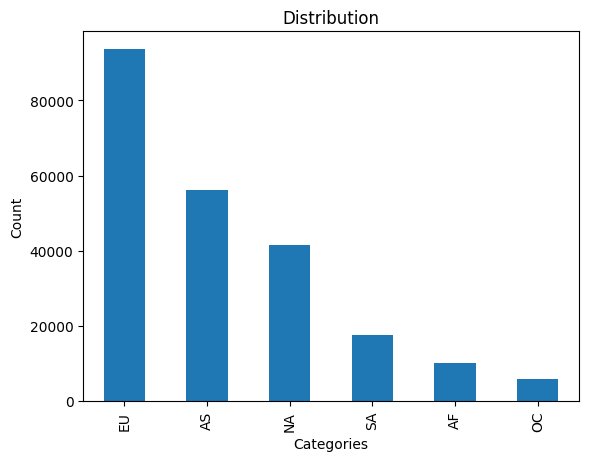

In [29]:
# Distribution
# Calculate the distribution of continent_data
distribution = important_data_continent['Continent'].value_counts()

# Plot the distribution
plt.figure()
distribution.plot(kind='bar')
plt.title(f"Distribution")
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

In [50]:
# Save the clusters data per continent
for continent, continent_data in df.items():
  # continent_data.to_csv(f"/content/drive/MyDrive/amr/{continent}.csv")
  print(f"Continent: {continent}")
  print(type(continent_data))

Continent: AF
<class 'pandas.core.frame.DataFrame'>
Continent: AS
<class 'pandas.core.frame.DataFrame'>
Continent: EU
<class 'pandas.core.frame.DataFrame'>
Continent: NA
<class 'pandas.core.frame.DataFrame'>
Continent: OC
<class 'pandas.core.frame.DataFrame'>
Continent: SA
<class 'pandas.core.frame.DataFrame'>


In [85]:
import matplotlib.pyplot as plt
def Resistance_Visualization(drugs_list,data_with_clusters,continent):
    import random
    import matplotlib.colors as mcolors

    selected_columns = []

    for drug in drugs_list:
        resistance_column = drug + '_I_Resistant'
        susceptible_column = drug + '_I_Susceptible'
        intermediate_column = drug + '_I_Intermediate'

        # Check if any of the three columns exist in the dataset
        if any(column in data_with_clusters.columns for column in [resistance_column, susceptible_column, intermediate_column]):
            selected_columns.extend([resistance_column, susceptible_column, intermediate_column])
        else:
            print(f"Skipping {drug} as all columns are missing.")

    # Check if any columns were selected
    if not selected_columns:
        print("No columns were selected. Aborting visualization.")
        return

    drug_resistance_columns = selected_columns

    resistance_data = data_with_clusters[['Cluster'] + drug_resistance_columns]

    drug_resistance_counts = resistance_data.groupby('Cluster').sum()

    total_counts = drug_resistance_counts.sum(axis=1)
    print(total_counts)
    # Get the total number of categories
    num_categories = len(selected_columns)

    # Generate a random sample of distinct colors from CSS4_COLORS
    colors = ['#73020C', '#426A8C', '#D94D1A',"#FF0000","#FFFF00","#00FF00","#000000","#800000","#00FFFF","#0000FF"]

    category_colors = dict(zip(selected_columns, colors))
    plt.figure(figsize=(80, 50))
    try:
      drug_resistance_counts.plot(kind='bar', color=category_colors)
      plt.title(f'Drug-Resistant Profiles Per cluster for {continent}')
      plt.xlabel('Cluster')
      plt.ylabel('Count')
      plt.xticks(rotation=0)
      plt.legend(loc='upper right', bbox_to_anchor=(1.8, 1))
      plt.savefig(f"/content/drive/MyDrive/amr/{drugs_list[0]}_{continent}.png")
      plt.show()

    except:
      print("no key found")


In [ ]:
#'Aminoglycosides': ['Amikacin', 'Gentamicin'],
  #Beta-lactam/BLI Combinations': ['Amoxycillin clavulanate', 'Piperacillin tazobactam', 'Ampicillin sulbactam'],

  # Cephalosporins': ['Cefepime', 'Ceftazidime', 'Ceftaroline', 'Ceftazidime avibactam'],
  # Carbapenems': ['Imipenem', 'Meropenem'],
  # Fluoroquinolones': ['Levofloxacin', 'Ciprofloxacin'],
  # Tetracyclines': ['Tigecycline'],
  # Colistin': ['Colistin'],
  # 'Other':'Aztreonam', 'Trimethoprim sulfa']

# Drug Resistance Profiles  per Continent per Cluster
##  Aminoglycosides
- Amikacin', 'Gentamicin

Cluster
0    2058
1    8470
2    4964
dtype: int64


<Figure size 8000x5000 with 0 Axes>

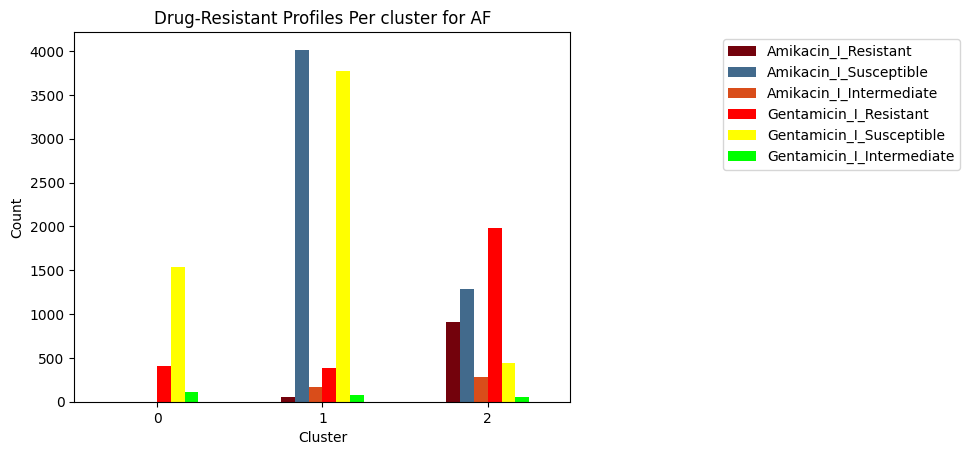

no key found
Cluster
0    10472
1    49010
2    25276
dtype: int64


<Figure size 8000x5000 with 0 Axes>

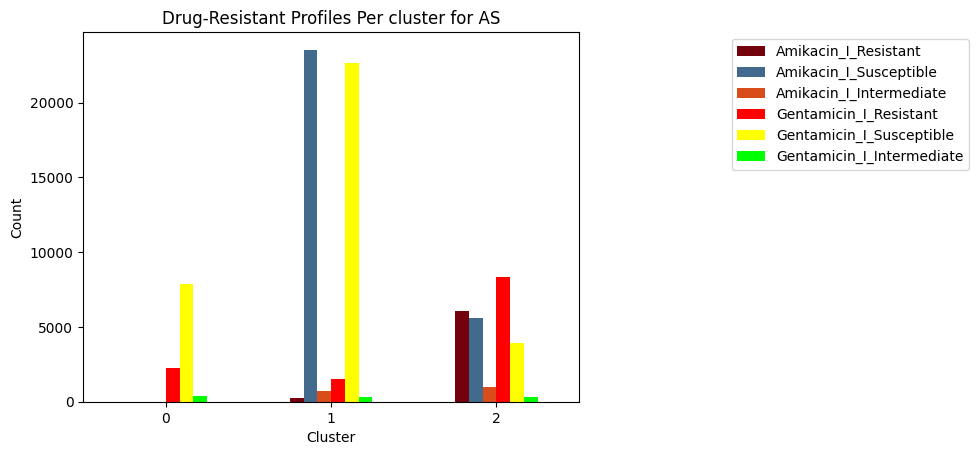

no key found
Cluster
0    17963
1    85546
2    24814
dtype: int64


<Figure size 8000x5000 with 0 Axes>

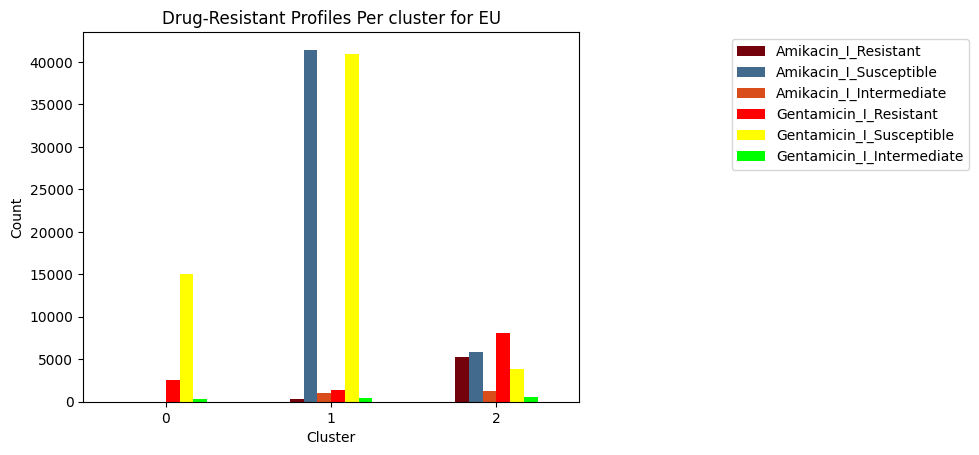

no key found
Cluster
0     8044
1    41481
2     9598
dtype: int64


<Figure size 8000x5000 with 0 Axes>

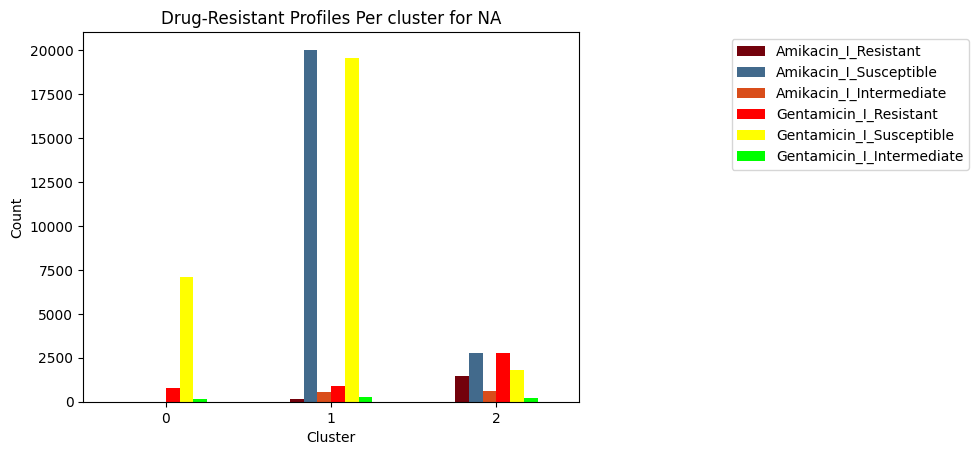

no key found
Cluster
0    1145
1    6536
2     286
dtype: int64


<Figure size 8000x5000 with 0 Axes>

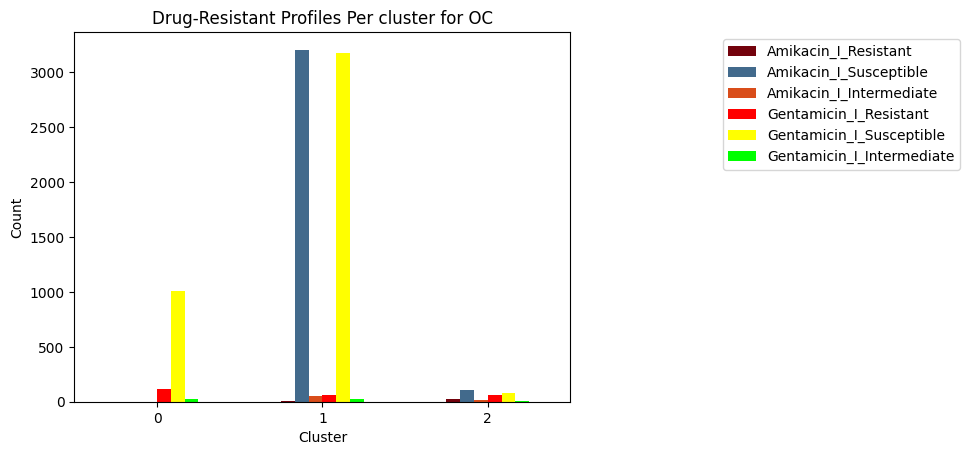

no key found
Cluster
0     3710
1    15288
2     7816
dtype: int64


<Figure size 8000x5000 with 0 Axes>

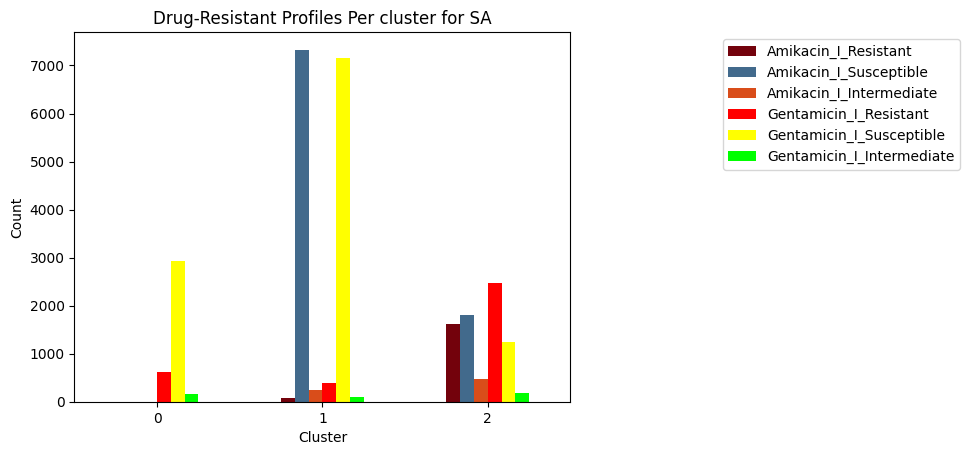

no key found


In [86]:
# List of drugs with resistance, susceptible, and intermediate profiles
drugs_list = ['Amikacin', 'Gentamicin']
# Drug Visualization from each continent
for continent, continent_data in df.items():
  # print(f"Continent: {continent}")
  # print(continent_data.shape)
  Resistance_Visualization(drugs_list, continent_data,continent)

In [ ]:
#

# Beta-lactam

Cluster
0      351
1    10482
2     6034
dtype: int64


<Figure size 8000x5000 with 0 Axes>

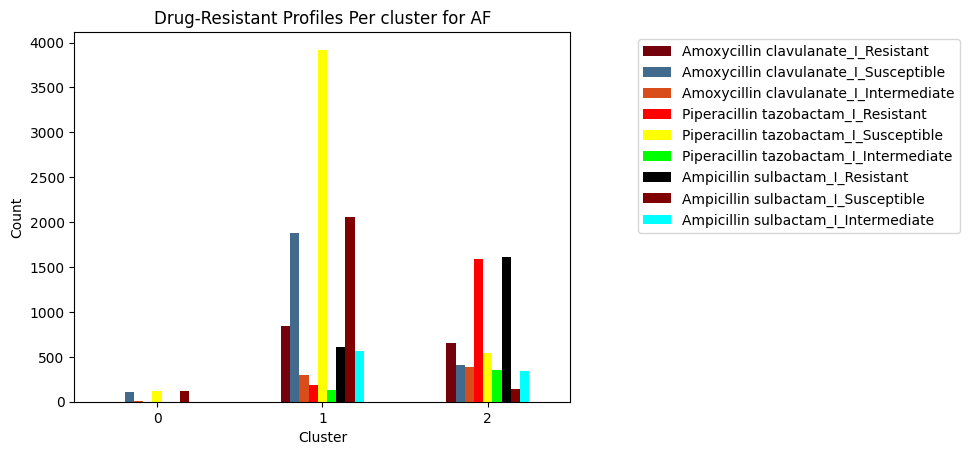

Cluster
0     2888
1    59601
2    29052
dtype: int64


<Figure size 8000x5000 with 0 Axes>

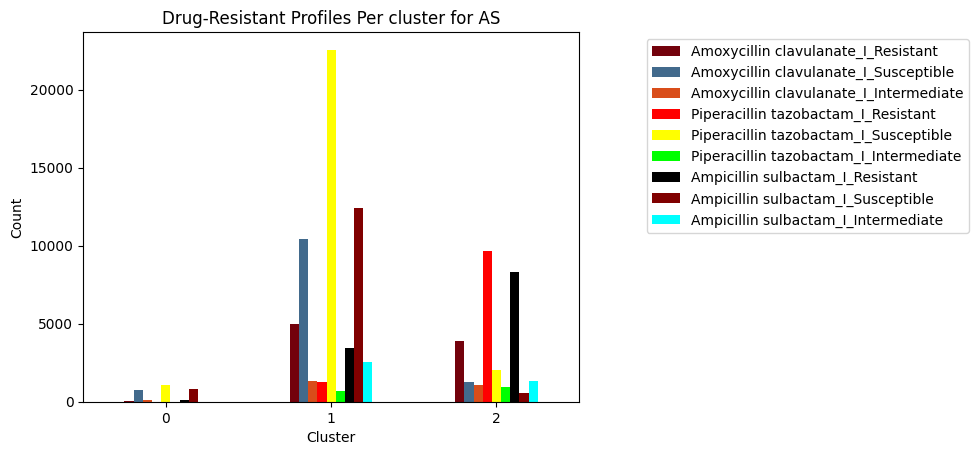

Cluster
0     10502
1    105077
2     26609
dtype: int64


<Figure size 8000x5000 with 0 Axes>

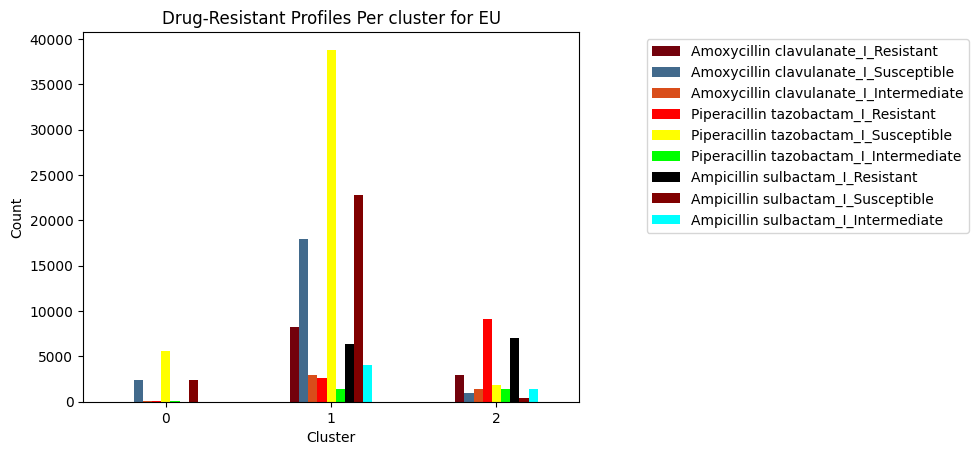

Cluster
0     3618
1    50875
2    10305
dtype: int64


<Figure size 8000x5000 with 0 Axes>

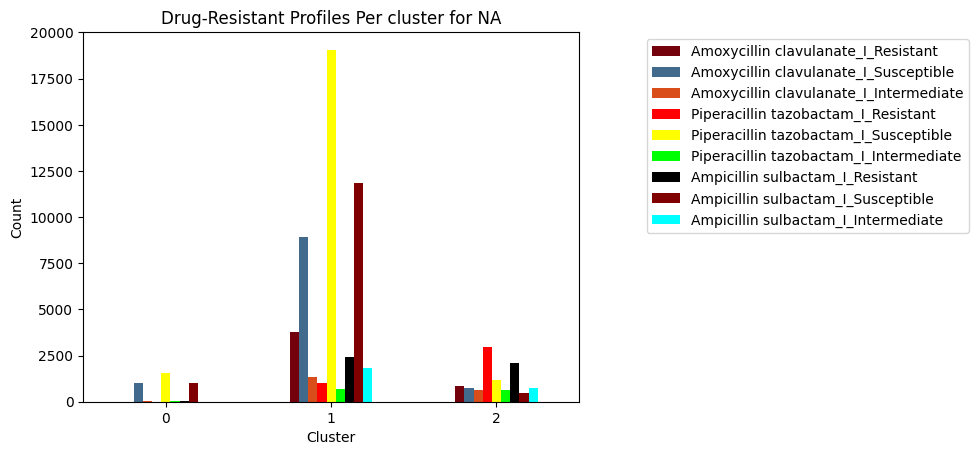

Cluster
0     552
1    7781
2     284
dtype: int64


<Figure size 8000x5000 with 0 Axes>

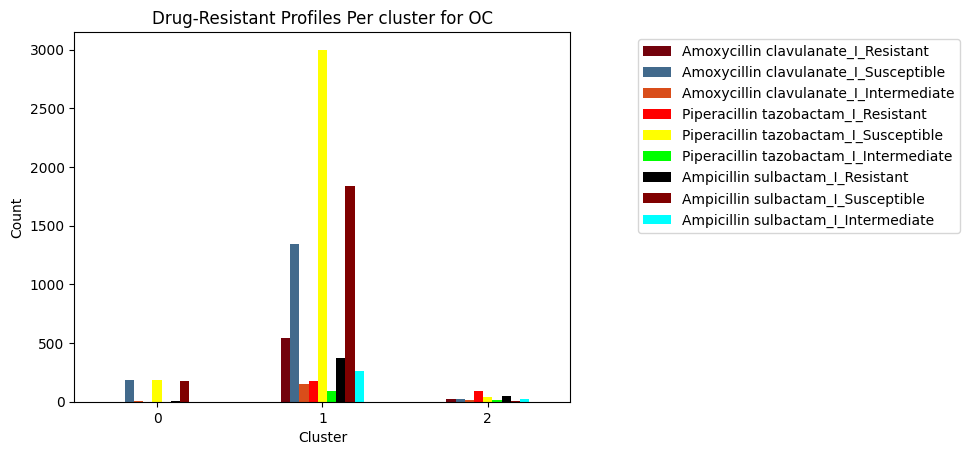

Cluster
0      588
1    18978
2     8923
dtype: int64


<Figure size 8000x5000 with 0 Axes>

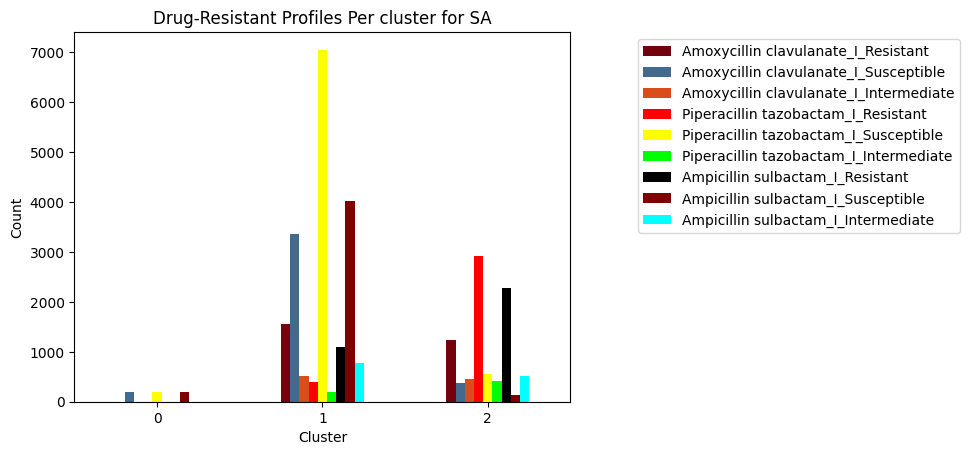

In [74]:
# List of drugs with resistance, susceptible, and intermediate profiles
drugs_betalactams = ['Amoxycillin clavulanate', 'Piperacillin tazobactam', 'Ampicillin sulbactam']
# Drug Visualization from each continent
for continent, continent_data in df.items():
  # print(f"Continent: {continent}")
  # print(continent_data.shape)
  Resistance_Visualization(drugs_betalactams, continent_data,continent)

  # Carbapenems': ['Imipenem', 'Meropenem'],


Cluster
0     578
1    8470
2    4965
dtype: int64


<Figure size 8000x5000 with 0 Axes>

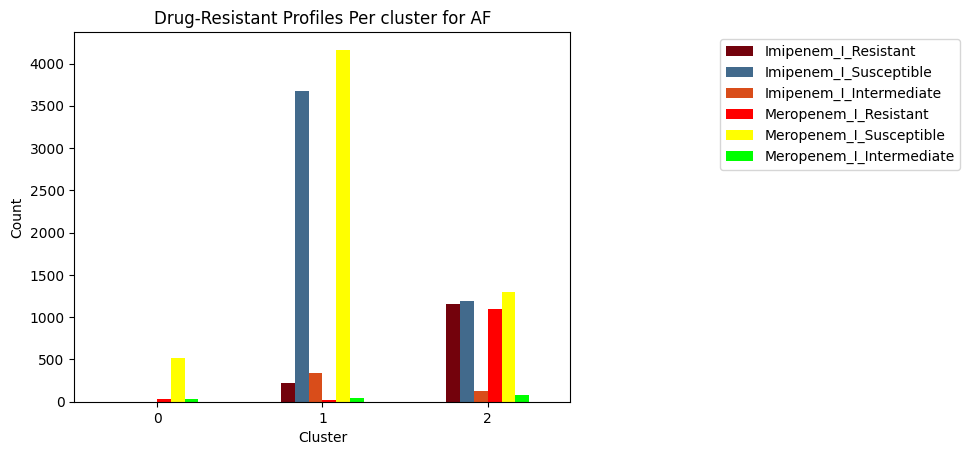

Cluster
0     4560
1    49010
2    25278
dtype: int64


<Figure size 8000x5000 with 0 Axes>

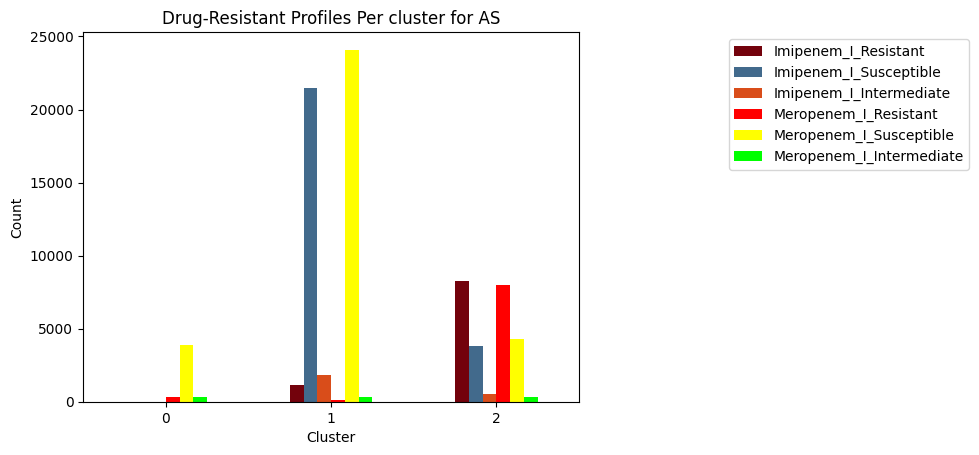

Cluster
0    13268
1    85546
2    24814
dtype: int64


<Figure size 8000x5000 with 0 Axes>

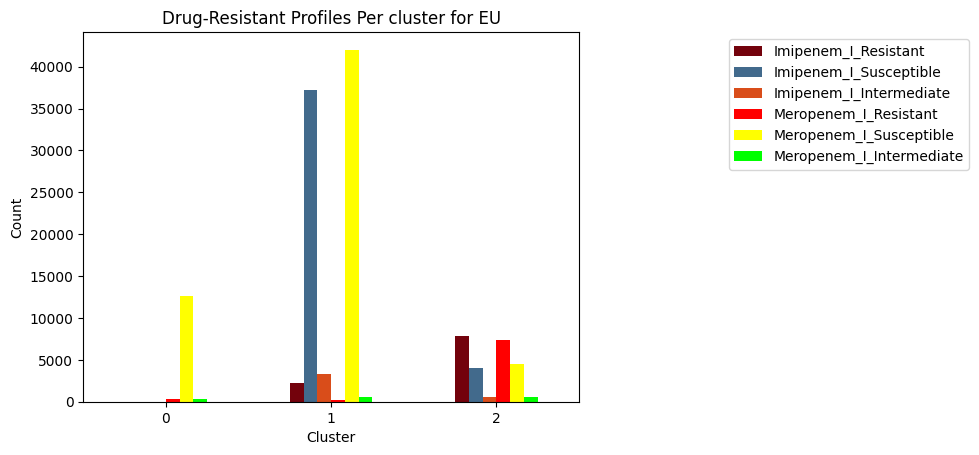

Cluster
0     4768
1    41482
2     9598
dtype: int64


<Figure size 8000x5000 with 0 Axes>

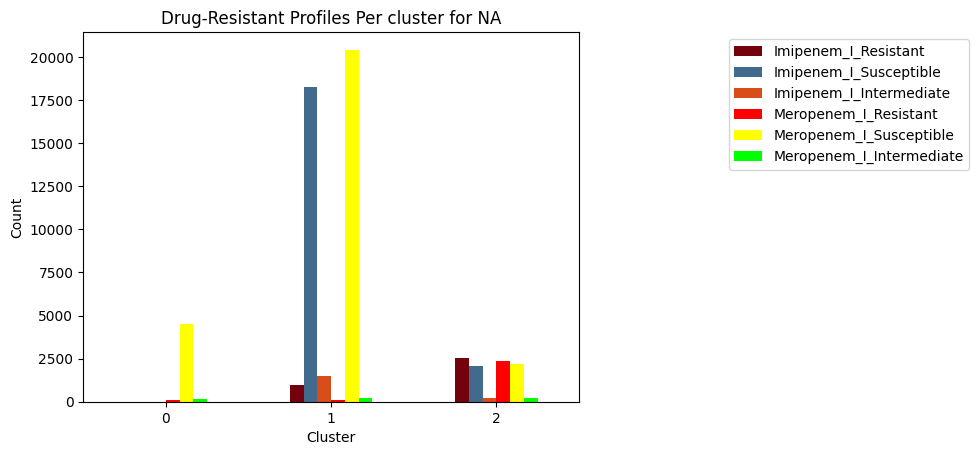

Cluster
0     776
1    6536
2     286
dtype: int64


<Figure size 8000x5000 with 0 Axes>

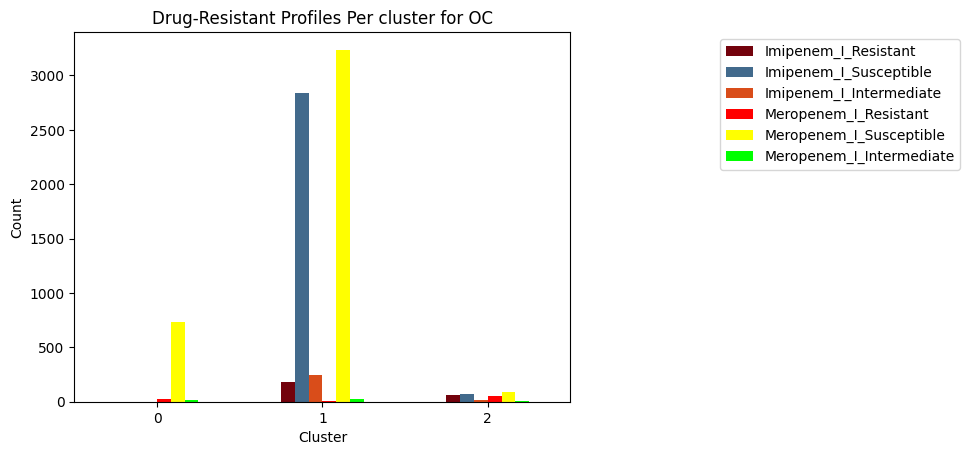

Cluster
0     1040
1    15293
2     7818
dtype: int64


<Figure size 8000x5000 with 0 Axes>

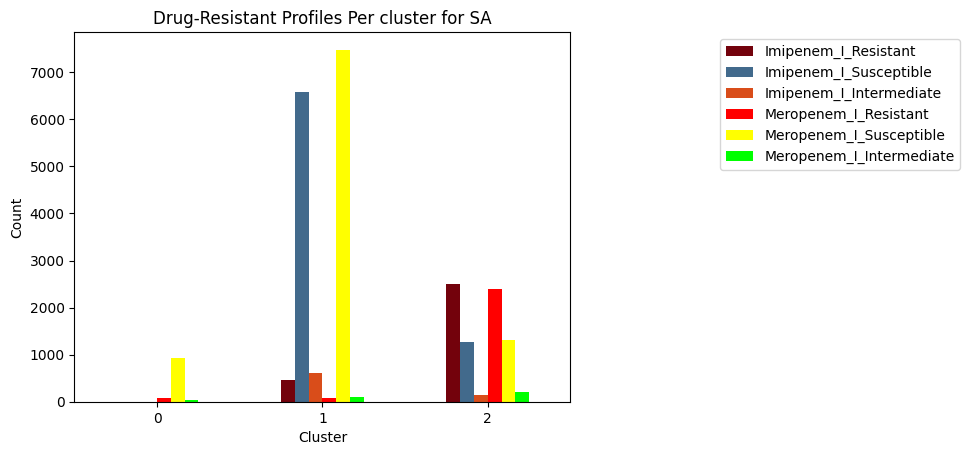

In [75]:
# List of drugs with resistance, susceptible, and intermediate profiles
drugs_betalactams = ['Imipenem', 'Meropenem']
# Drug Visualization from each continent
for continent, continent_data in df.items():
  # print(f"Continent: {continent}")
  # print(continent_data.shape)
  Resistance_Visualization(drugs_betalactams, continent_data,continent)

In [ ]:
# Content vs resistance to  Fluoroquinolones

# Content vs resistance to  Fluoroquinolones

In [ ]:
# Fluoroquinolones': ['Levofloxacin', 'Ciprofloxacin'],

Cluster
0    3211
1    8470
2    4973
dtype: int64


<Figure size 8000x5000 with 0 Axes>

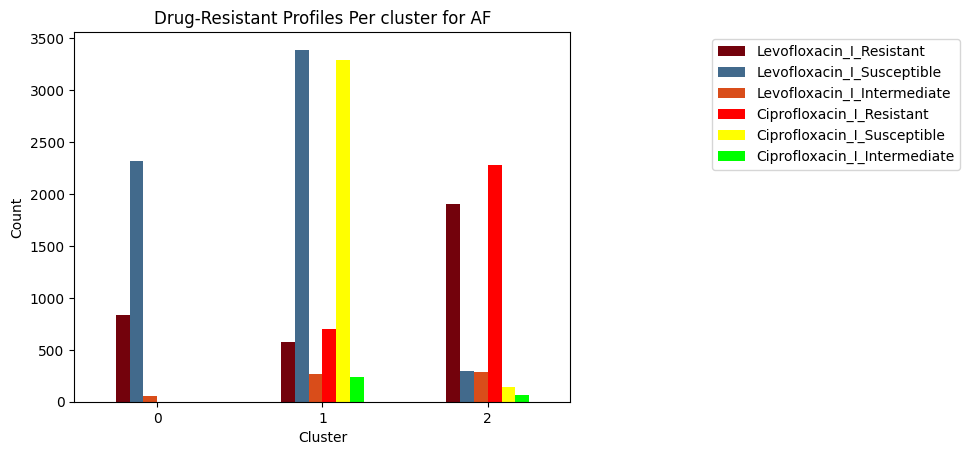

Cluster
0    18377
1    49008
2    25305
dtype: int64


<Figure size 8000x5000 with 0 Axes>

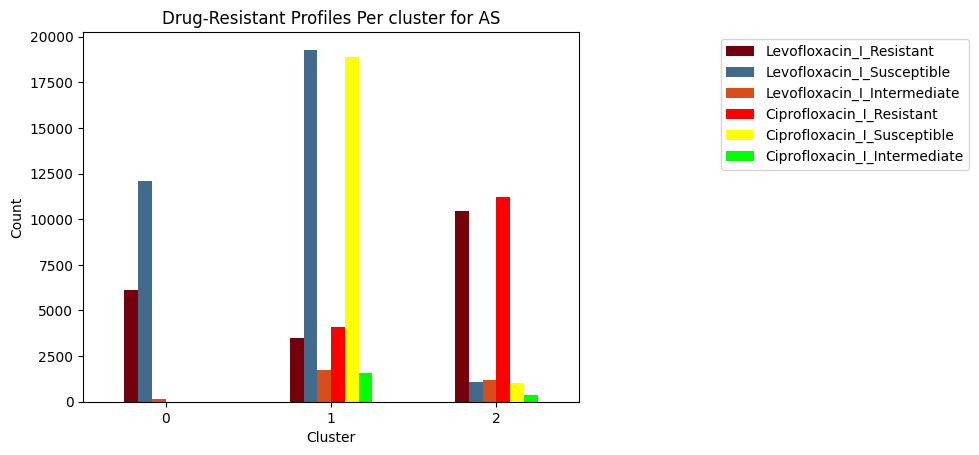

Cluster
0    33979
1    85549
2    24820
dtype: int64


<Figure size 8000x5000 with 0 Axes>

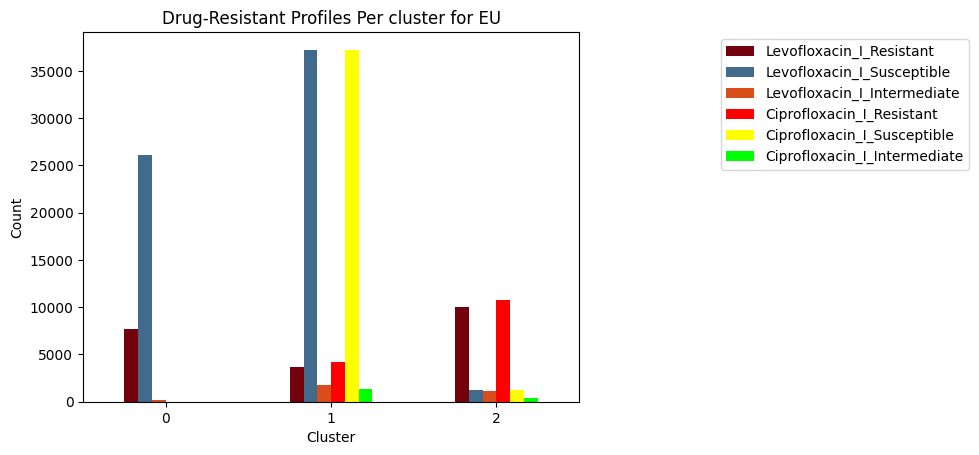

Cluster
0    14989
1    41482
2     9607
dtype: int64


<Figure size 8000x5000 with 0 Axes>

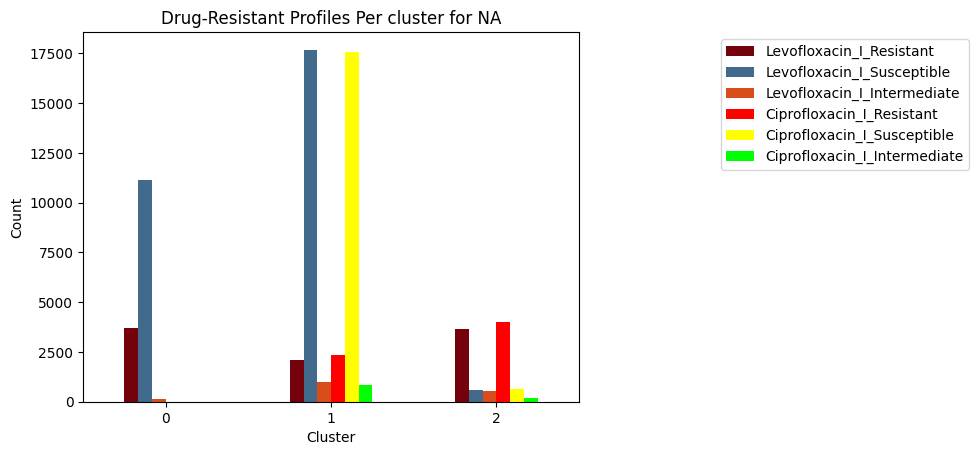

Cluster
0    2330
1    6536
2     286
dtype: int64


<Figure size 8000x5000 with 0 Axes>

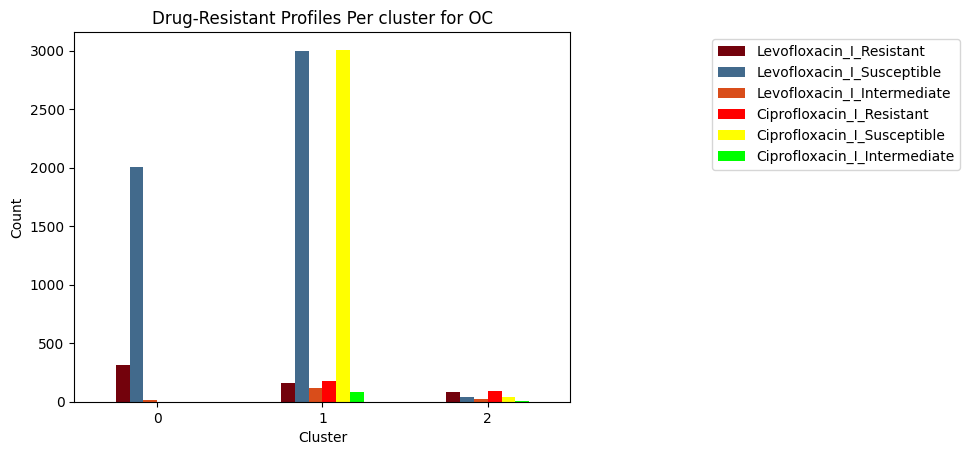

Cluster
0     5950
1    15295
2     7826
dtype: int64


<Figure size 8000x5000 with 0 Axes>

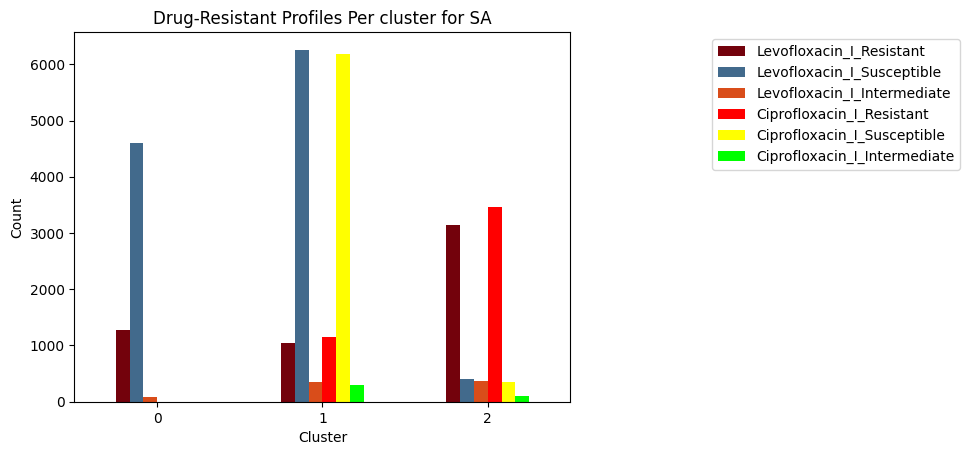

In [76]:
# List of drugs with resistance, susceptible, and intermediate profiles
drugs_list = ['Levofloxacin', 'Ciprofloxacin']
# Drug Visualization from each continent
for continent, continent_data in df.items():
  # print(f"Continent: {continent}")
  # print(continent_data.shape)
  Resistance_Visualization(drugs_list, continent_data,continent)

  # Others
  # Tetracyclines': ['Tigecycline'],
  # Colistin': ['Colistin'],
  # 'Other':'Aztreonam', 'Trimethoprim sulfa']

Cluster
0    3211
1    7036
2    3289
dtype: int64


<Figure size 8000x5000 with 0 Axes>

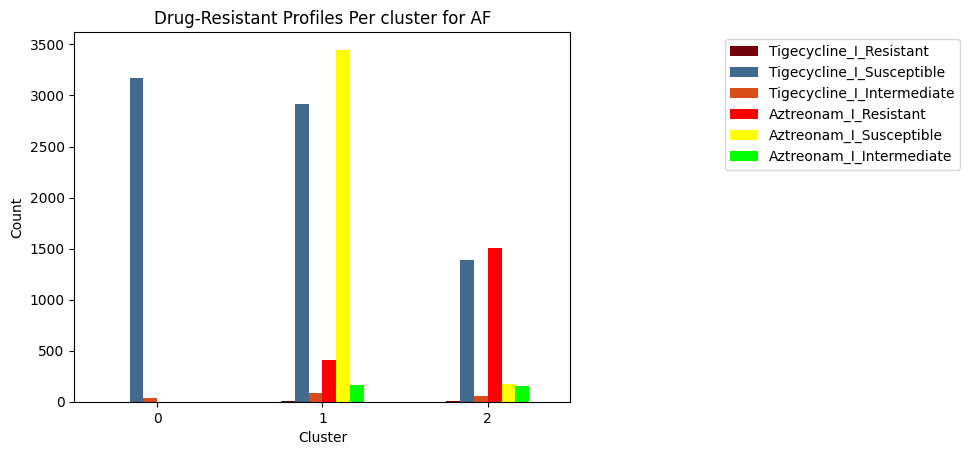

Cluster
0    18588
1    39566
2    14869
dtype: int64


<Figure size 8000x5000 with 0 Axes>

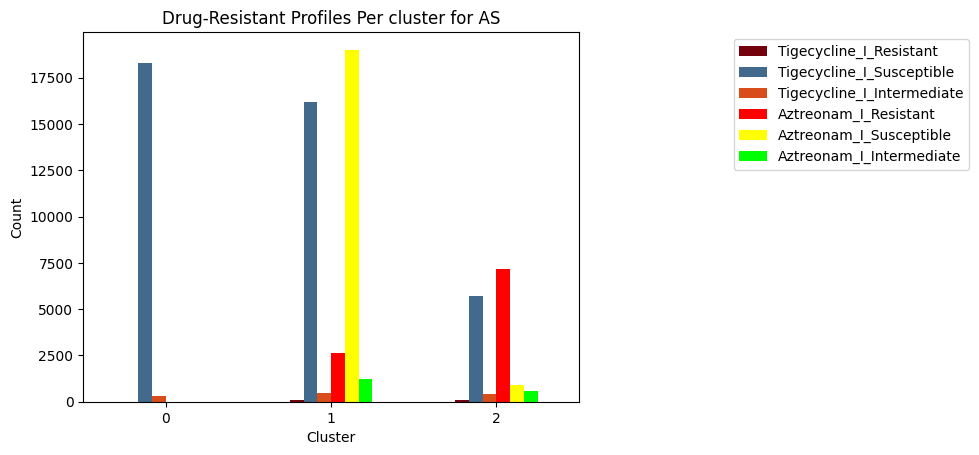

Cluster
0    37190
1    67967
2    14234
dtype: int64


<Figure size 8000x5000 with 0 Axes>

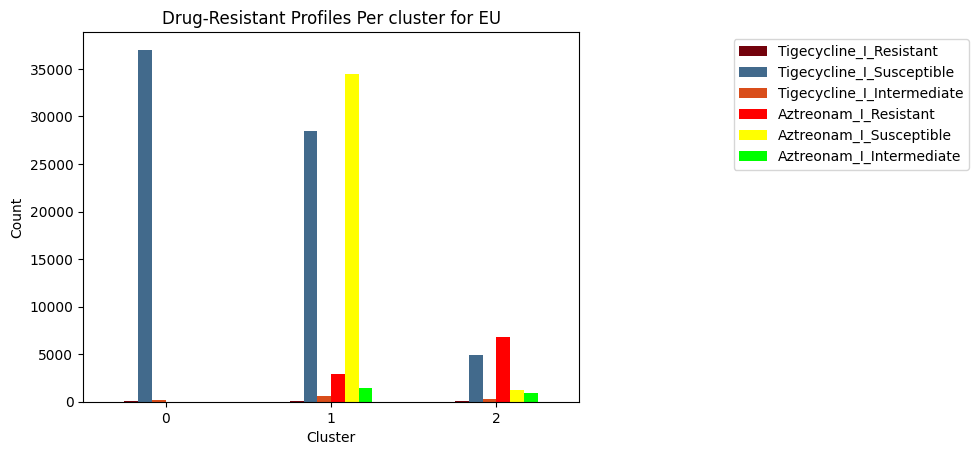

Cluster
0    15508
1    32579
2     5854
dtype: int64


<Figure size 8000x5000 with 0 Axes>

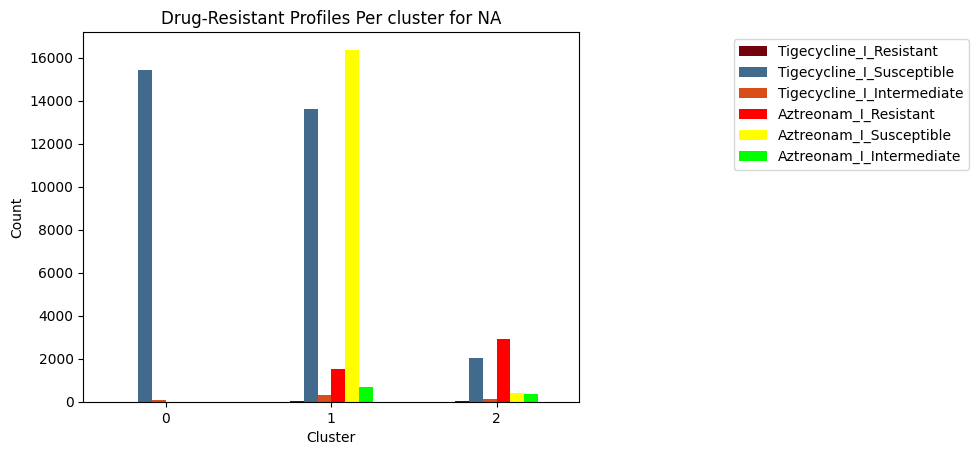

Cluster
0    2330
1    4884
2     194
dtype: int64


<Figure size 8000x5000 with 0 Axes>

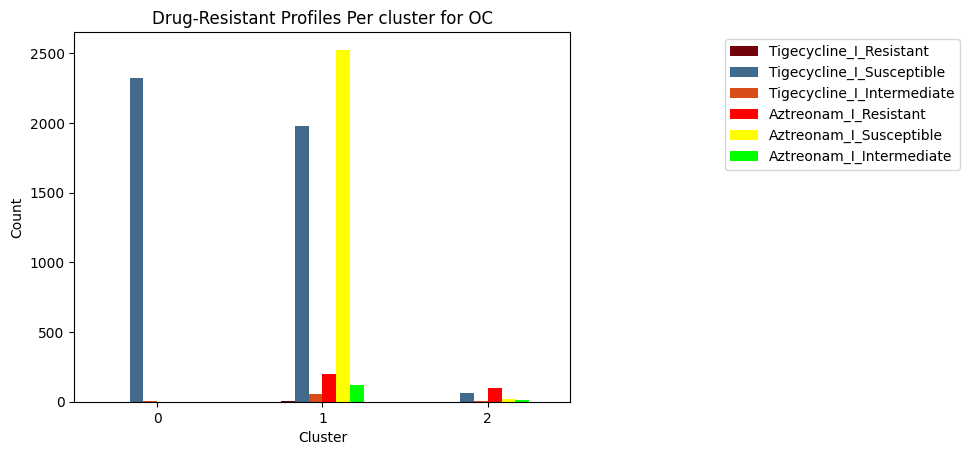

Cluster
0     5950
1    12603
2     5130
dtype: int64


<Figure size 8000x5000 with 0 Axes>

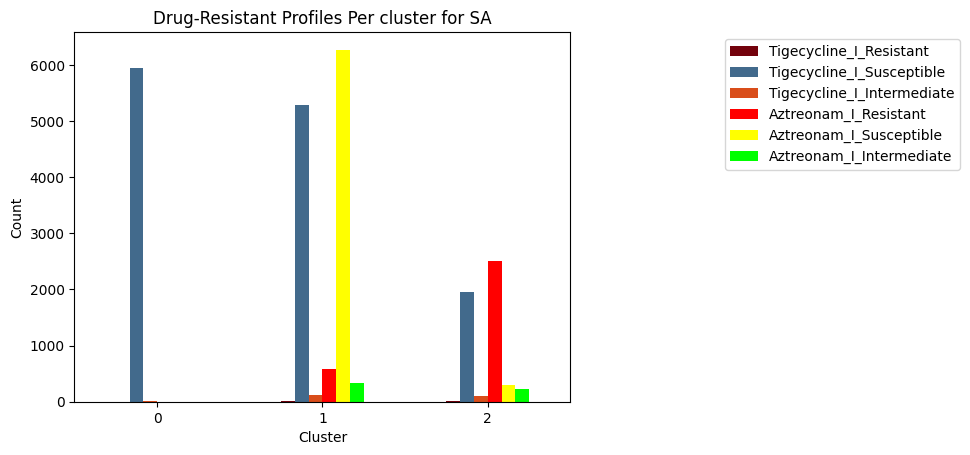

In [84]:
# List of drugs with resistance, susceptible, and intermediate profiles
drugs_list_others = ['Tigecycline',"Aztreonam"]
# Drug Visualization from each continent
for continent, continent_data in df.items():
  # print(f"Continent: {continent}")
  # print(continent_data.shape)
  Resistance_Visualization(drugs_list_others, continent_data,continent)

In [ ]:
import prince
def KNN_clustering(data_input,column):
  # Calculate the percentage of missing values in each column
  missing_percentages = data_input.isnull().mean() * 100

  # Identify columns with more than 40% missingness
  columns_to_drop = missing_percentages[missing_percentages > 40].index

  # Drop the identified columns
  df_dropped = data_input.drop(columns=columns_to_drop)
  imputed_data = pd.get_dummies(df_dropped)
  print(imputed_data.columns)
  #Reduce Dimentionality
  mca = prince.MCA()
  mca.fit(imputed_data)
  count=1
  # Analyze eigenvalues and cumulative explained variance
  eigenvalues = mca.eigenvalues_
  total_variance = sum(eigenvalues)
  explained_variance_ratio = eigenvalues / total_variance
  cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

  # Determine the number of components for at least 90% cumulative explained variance
  num_components_to_retain = np.argmax(cumulative_variance_ratio >= 0.9) + 1

  # Create new MCA object with the desired number of components
  reduced_mca = prince.MCA(n_components=num_components_to_retain)

  # Fit the new MCA object to your data
  reduced_mca.fit(imputed_data)

  # Transform your data to obtain the reduced-dimensional representation
  reduced_data = reduced_mca.transform(imputed_data)
  # save to csv
  reduced_data.to_csv(f"/content/drive/MyDrive/amr/{column}.csv")
  reduced_data
  # clustering
  # Y_sklearn = reduced_mca.fit_transform(reduced_data)
  kmeans = KMeans(n_clusters= 3, max_iter=600, algorithm = 'auto')
  kmeans
  %time fitted = kmeans.fit(reduced_data)
  #  'prediction' contains the cluster labels assigned by KMeans
  prediction = kmeans.predict(reduced_data)
  # Clustering
  # Get unique cluster labels
  unique_labels = set(prediction)

  # Plot the scatter plot of the reduced data with cluster assignments
  plt.scatter(reduced_data.values[:, 0], reduced_data.values[:, 1], c=prediction, s=50, cmap='viridis')

  # Clustering
  # Add one label for each cluster
  for label in unique_labels:
      # Find the first index of the cluster label
      index = prediction.tolist().index(label)
      # Add the label as a text annotation at the corresponding data point
      plt.text(reduced_data.values[index, 0], reduced_data.values[index, 1], str(label), ha='center', va='center')

  # Plot the cluster centers
  centers2 = kmeans.cluster_centers_
  plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=300, alpha=0.6)

  # Remove the duplicate legend entries
  plt.legend().remove()
  # Save the figure to a file
  plt.savefig(f"/content/drive/MyDrive/amr/{column}.png")

  # Show the plot
  plt.show()

  # Create a new DataFrame with the original data and cluster labels
  data_with_clusters = pd.DataFrame(data=data_input, columns=data_input.columns)
  data_with_clusters['Cluster'] = prediction

  # Group the data by the provided column
  grouped_data = data_with_clusters.groupby(column)

  # Return a dictionary of dataframes, with each dataframe representing a group
  grouped_data_dict = {}
  for group, group_data in grouped_data:
      # Create a new DataFrame with the one-hot encoded columns and cluster labels for the group
      group_data_with_columns = pd.get_dummies(group_data)


  return grouped_data_dict



In [94]:
# Correlation Analysis
import random
import matplotlib.pyplot as plt
import seaborn as sns
def Correlation_matrix_per_Continent(data_with_clusters):
  # List of drugs with resistance, susceptible, and intermediate profiles
  drugs_list = ['Amikacin', 'Amoxycillin clavulanate', 'Ampicillin', 'Azithromycin', 'Cefepime', 'Cefoxitin', 'Ceftazidime', 'Ceftriaxone', 'Clindamycin', 'Erythromycin', 'Imipenem', 'Levofloxacin', 'Linezolid', 'Meropenem', 'Metronidazole', 'Penicillin', 'Piperacillin tazobactam', 'Tigecycline', 'Vancomycin', 'Ampicillin sulbactam', 'Aztreonam', 'Ceftaroline', 'Ceftazidime avibactam', 'Ciprofloxacin', 'Colistin', 'Daptomycin', 'Gentamicin', 'Oxacillin', 'Teicoplanin', 'Trimethoprim sulfa', 'Meropenem vaborbactam']

  # Create a list to store the selected drug resistance columns
  selected_columns = []

  # Iterate over the drugs list and check if each drug has the three combinations of resistance, susceptibility, and intermediate
  for drug in drugs_list:
      resistance_column = drug + '_I_Resistant'
      susceptible_column = drug + '_I_Susceptible'
      intermediate_column = drug + '_I_Intermediate'

      # Check if all three columns exist in the dataset
      if all(column in data_with_clusters.columns for column in [resistance_column, susceptible_column, intermediate_column]):
          selected_columns.extend([resistance_column, susceptible_column, intermediate_column])
      else:
          print(f"Skipping {drug} as one or more columns are missing.")

  # Select the relevant drug resistance columns for analysis
  drug_resistance_columns = selected_columns

  # Create a new DataFrame with the selected columns and cluster labels
  resistance_data = data_with_clusters[['Cluster'] + drug_resistance_columns]

  # Group the data by the cluster labels
  grouped_data = resistance_data.groupby('Cluster')

  # Iterate over each cluster and create a correlation matrix heatmap
  for cluster, cluster_data in grouped_data:
      # Calculate the sum of resistance, susceptibility, and intermediate statuses for each drug in the current cluster
      drug_resistance_counts = cluster_data.drop('Cluster', axis=1).sum()

      # Calculate the correlation matrix
      correlation_matrix = cluster_data.drop('Cluster', axis=1).corr()

      # Plot the correlation matrix heatmap
      plt.figure(figsize=(20, 15))
      sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True, linewidths=0.5, annot_kws={"fontsize": 7})

      plt.title(f'Drug-Resistant Profiles for Cluster {cluster}')
      plt.xlabel('Drug')
      plt.ylabel('Drug')
      plt.xticks(rotation=90, fontsize=7)
      plt.yticks(rotation=0, fontsize=7)
      plt.tight_layout()
      plt.show()


In [92]:
df

{'AF':             Cluster  Amikacin_0.5  Amikacin_1  Amikacin_16  Amikacin_2  \
 Isolate Id                                                               
 1777705           1             0           0            0           1   
 1777706           1             0           0            0           0   
 1777707           1             0           0            0           1   
 1777708           1             0           1            0           0   
 1777709           1             0           0            0           1   
 ...             ...           ...         ...          ...         ...   
 2560959           0             0           0            0           0   
 2560960           0             0           0            0           0   
 2560961           0             0           0            0           0   
 2560964           0             0           0            0           0   
 2560965           2             0           0            0           0   
 
             Amik

Index(['Age Group_0 to 2 Years', 'Age Group_13 to 18 Years',
       'Age Group_19 to 64 Years', 'Age Group_3 to 12 Years',
       'Age Group_65 to 84 Years', 'Age Group_85 and Over',
       'Age Group_Unknown', 'Amikacin_0.5', 'Amikacin_1', 'Amikacin_16',
       ...
       'Trimethoprim sulfa_>2', 'Trimethoprim sulfa_>32',
       'Trimethoprim sulfa_I_Resistant', 'Trimethoprim sulfa_I_Susceptible',
       'Continent_AF', 'Continent_AS', 'Continent_EU', 'Continent_NA',
       'Continent_OC', 'Continent_SA'],
      dtype='object', length=307)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


CPU times: user 1.8 s, sys: 752 ms, total: 2.56 s
Wall time: 1.46 s


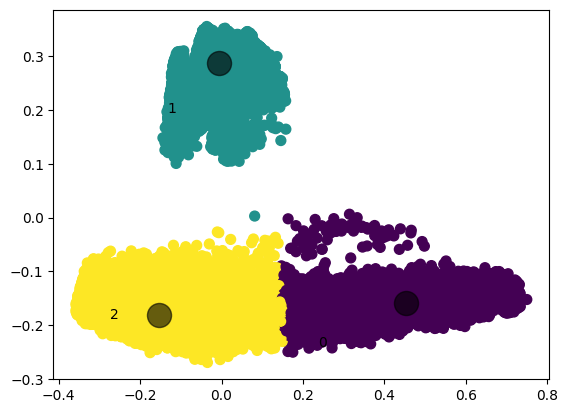

{'0 to 2 Years':             Cluster  Age Group_0 to 2 Years  Amikacin_0.5  Amikacin_1  \
 Isolate Id                                                              
 1773210           2                       1             0           0   
 1773250           1                       1             0           0   
 1773280           1                       1             0           0   
 1773305           1                       1             0           0   
 1773310           1                       1             0           0   
 ...             ...                     ...           ...         ...   
 2566303           1                       1             0           0   
 2567131           1                       1             0           0   
 2567503           2                       1             0           1   
 2567585           1                       1             0           0   
 2570127           1                       1             0           0   
 
             Amikaci

In [101]:
# Age-Dtug resistance  clustering analysis
df_age=KNN_clustering(important_data_age,"Age Group")
df_age

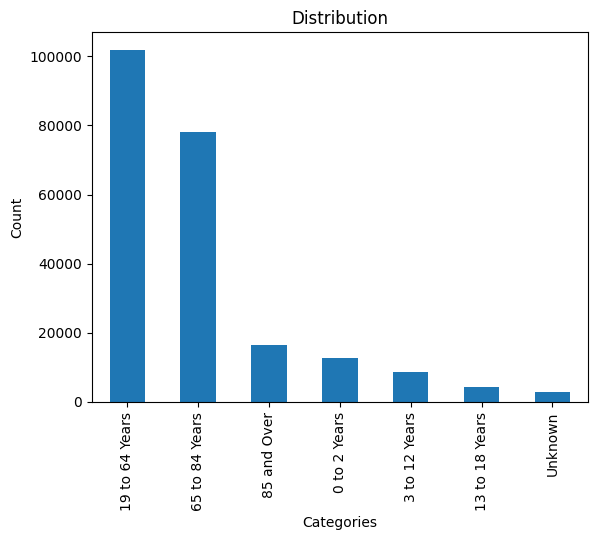

In [103]:
# Distribution
# Calculate the distribution of continent_data
distribution = important_data_age['Age Group'].value_counts()
# Plot the distribution
plt.figure()
distribution.plot(kind='bar')
plt.title(f"Distribution")
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

# Drug resistance patterns by Age


Cluster
0     3108
1     2694
2    10528
dtype: int64


<Figure size 8000x5000 with 0 Axes>

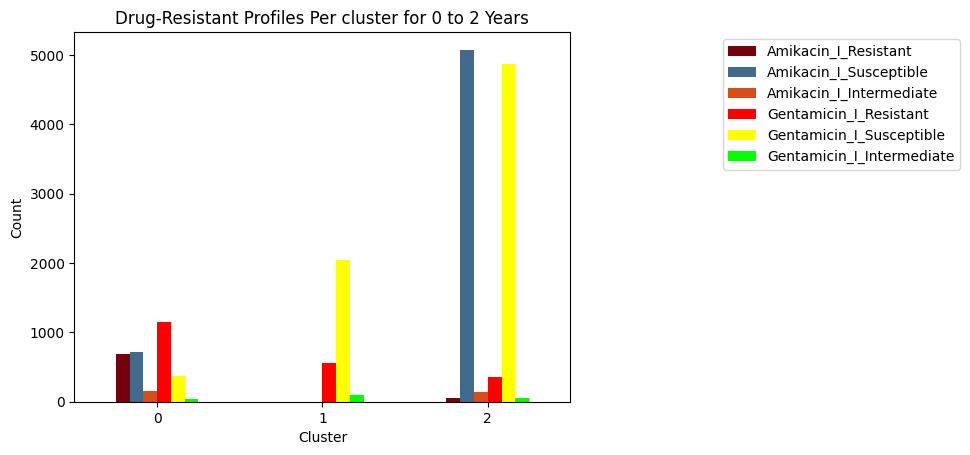

no key found
Cluster
0    1090
1    1215
2    3574
dtype: int64


<Figure size 8000x5000 with 0 Axes>

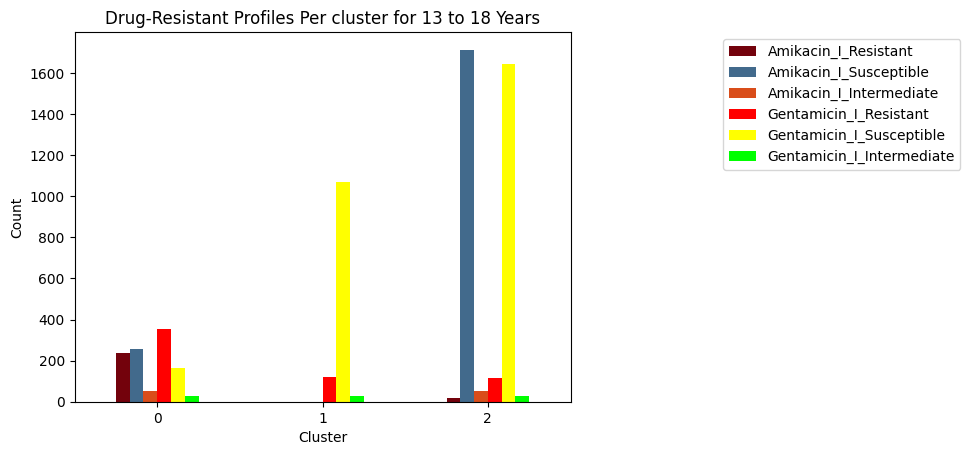

no key found
Cluster
0    35274
1    21296
2    88477
dtype: int64


<Figure size 8000x5000 with 0 Axes>

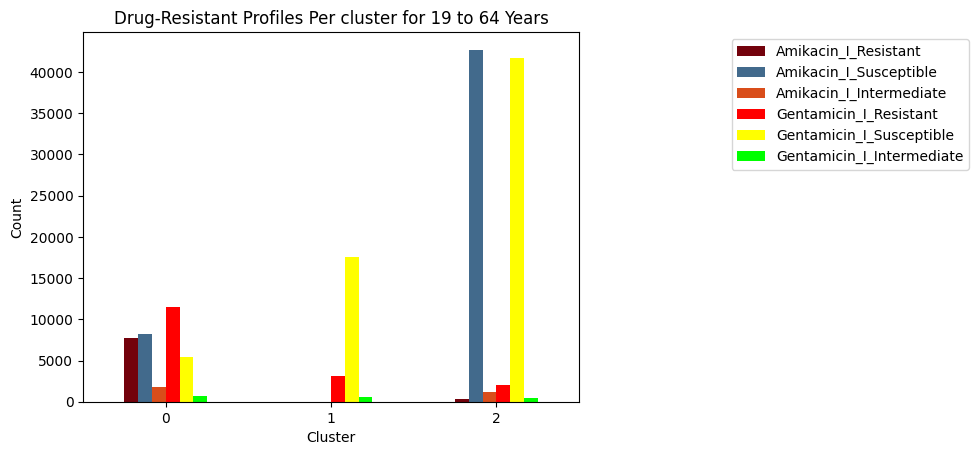

no key found
Cluster
0    1706
1    2074
2    6552
dtype: int64


<Figure size 8000x5000 with 0 Axes>

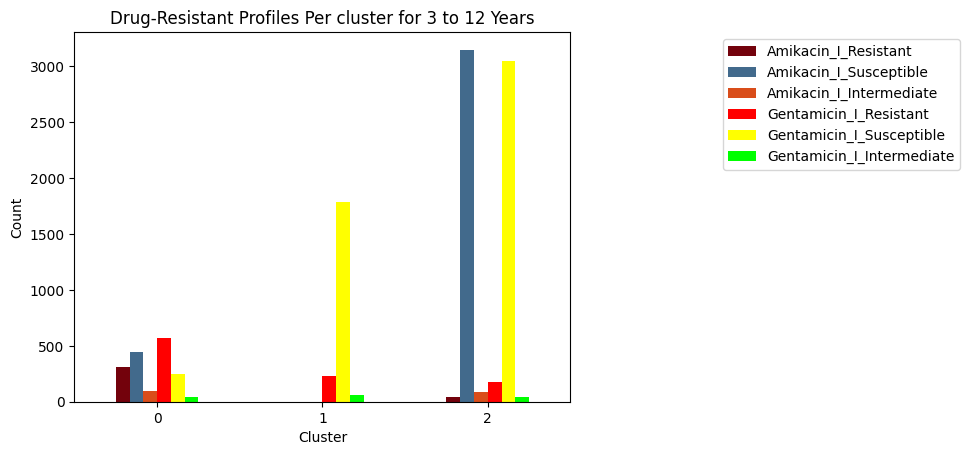

no key found
Cluster
0    26110
1    12943
2    77298
dtype: int64


<Figure size 8000x5000 with 0 Axes>

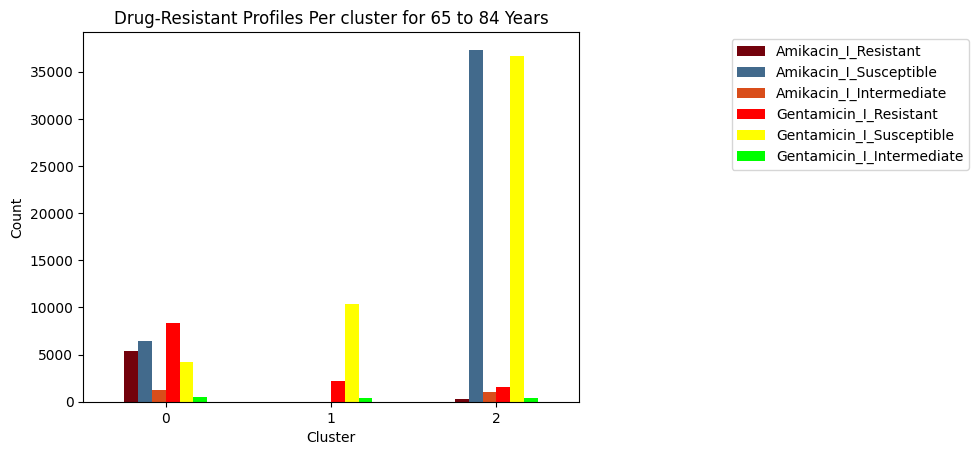

no key found
Cluster
0     4444
1     2621
2    17414
dtype: int64


<Figure size 8000x5000 with 0 Axes>

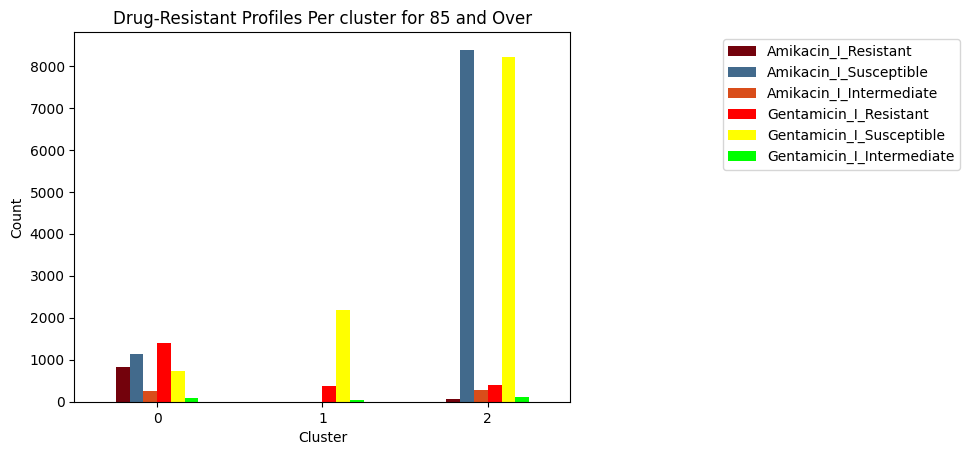

no key found
Cluster
0     998
1     549
2    2512
dtype: int64


<Figure size 8000x5000 with 0 Axes>

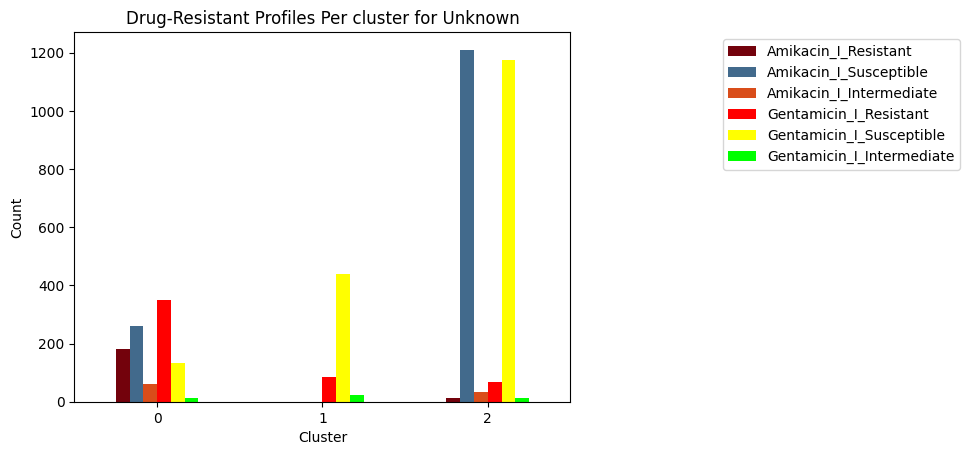

no key found


In [105]:
# List of drugs with resistance, susceptible, and intermediate profiles
drugs_list = ['Amikacin', 'Gentamicin']
# Drug Visualization from each continent
for age, continent_data in df_age.items():
  # print(f"Continent: {continent}")
  # print(continent_data.shape)
  Resistance_Visualization(drugs_list, continent_data,age)

# Age and beta lactam resistance profiles

Cluster
0     3749
1     1576
2    13252
dtype: int64


<Figure size 8000x5000 with 0 Axes>

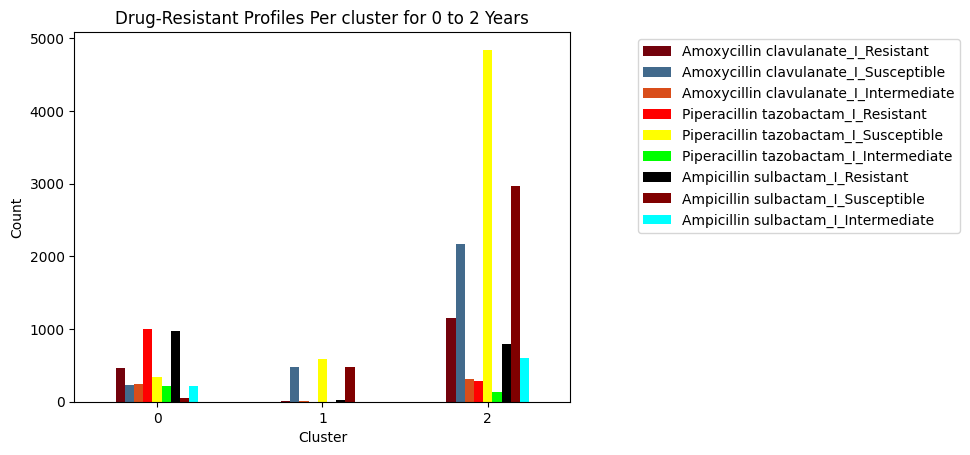

no key found
Cluster
0    1175
1     350
2    4177
dtype: int64


<Figure size 8000x5000 with 0 Axes>

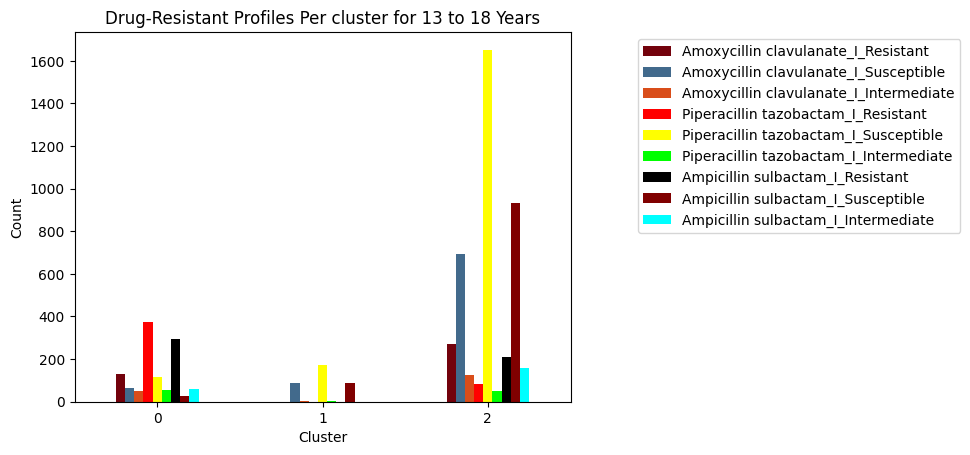

no key found
Cluster
0     39008
1      7928
2    108338
dtype: int64


<Figure size 8000x5000 with 0 Axes>

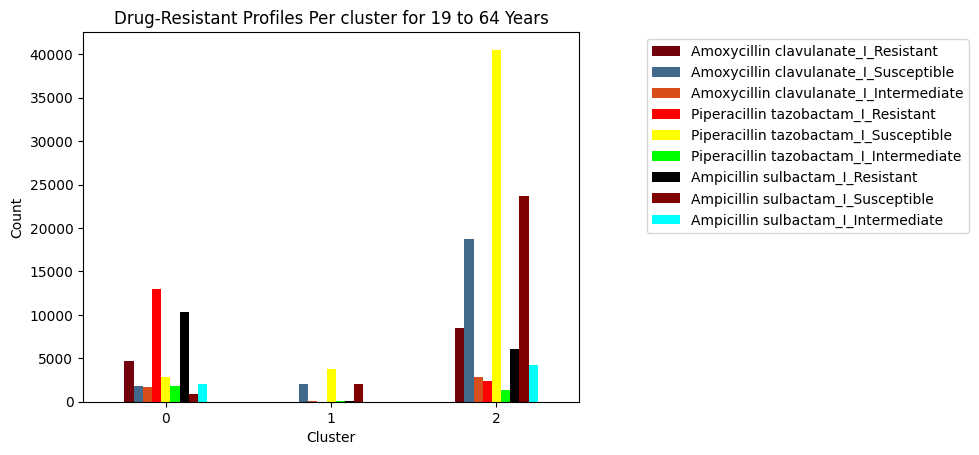

no key found
Cluster
0    1895
1    1295
2    7500
dtype: int64


<Figure size 8000x5000 with 0 Axes>

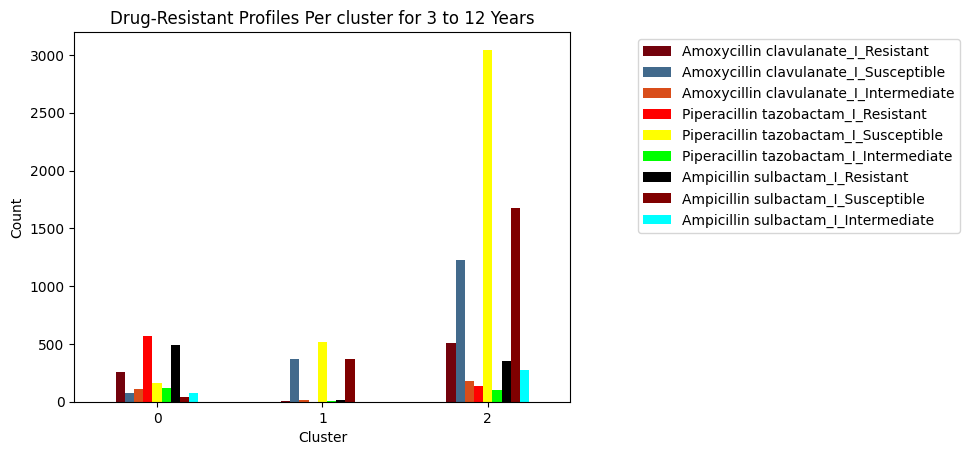

no key found
Cluster
0    29255
1     6016
2    94875
dtype: int64


<Figure size 8000x5000 with 0 Axes>

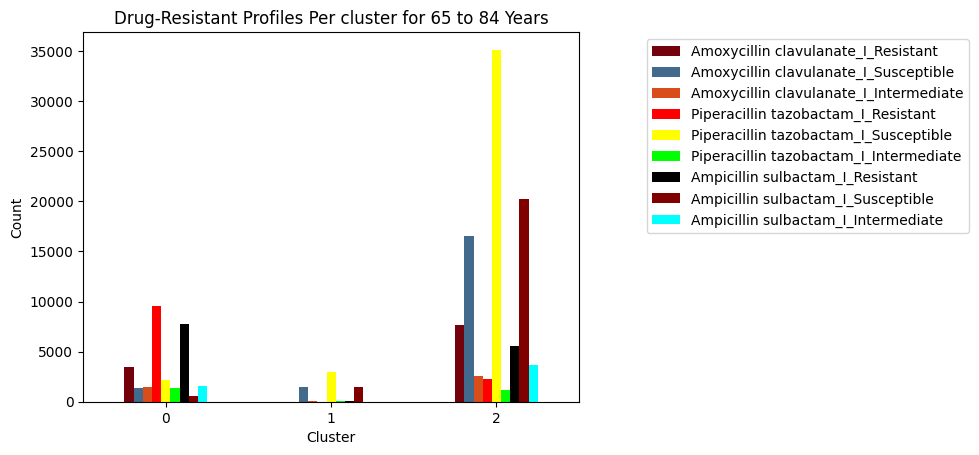

no key found
Cluster
0     4974
1     1138
2    21574
dtype: int64


<Figure size 8000x5000 with 0 Axes>

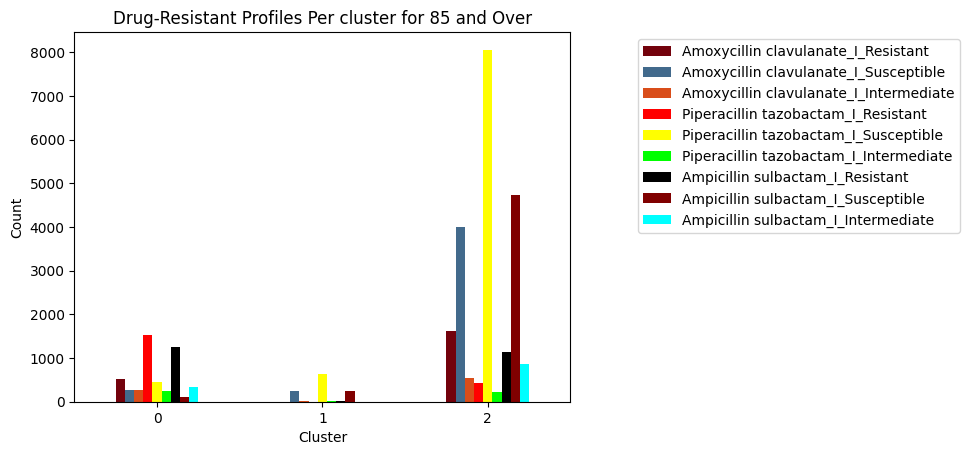

no key found
Cluster
0    1123
1     196
2    3106
dtype: int64


<Figure size 8000x5000 with 0 Axes>

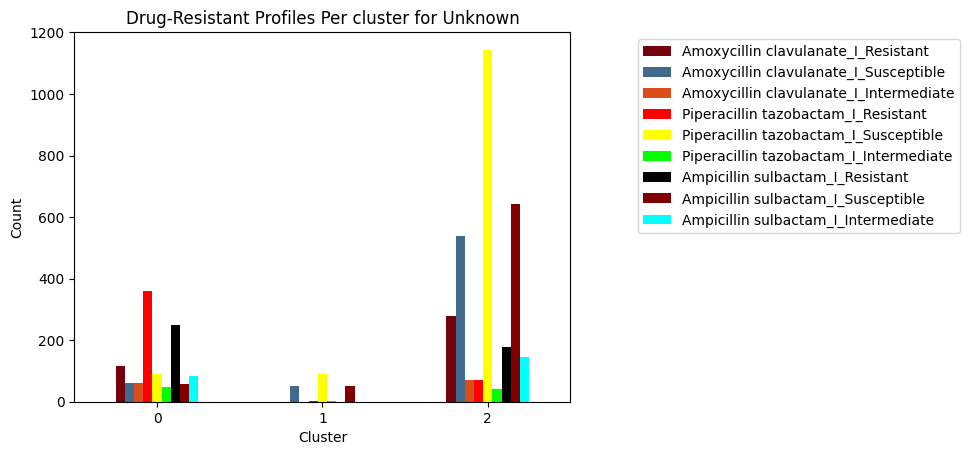

no key found


In [106]:
# Beta-lactam
# List of drugs with resistance, susceptible, and intermediate profiles
drugs_betalactams = ['Amoxycillin clavulanate', 'Piperacillin tazobactam', 'Ampicillin sulbactam']
# Drug Visualization from each continent
for continent, continent_data in df_age.items():
  # print(f"Continent: {continent}")
  # print(continent_data.shape)
  Resistance_Visualization(drugs_betalactams, continent_data,continent)

# Age vs Fluoro

Cluster
0     3110
1     5195
2    10529
dtype: int64


<Figure size 8000x5000 with 0 Axes>

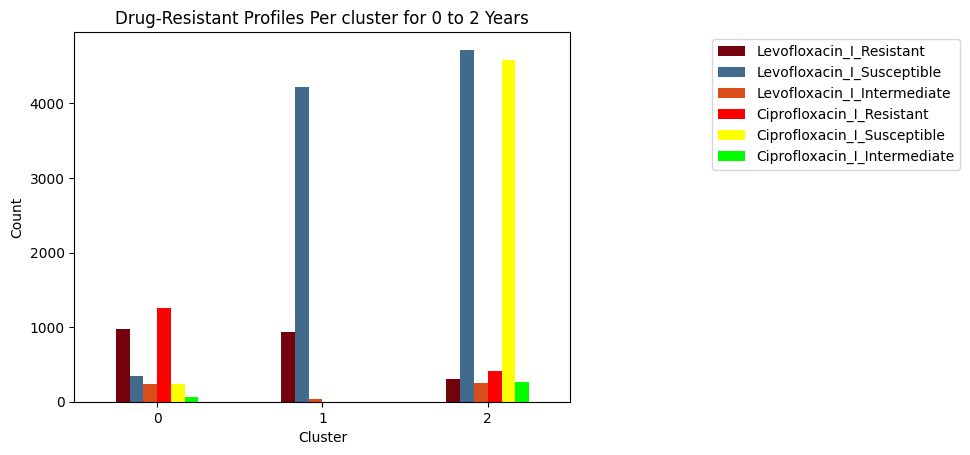

no key found
Cluster
0    1092
1    1850
2    3574
dtype: int64


<Figure size 8000x5000 with 0 Axes>

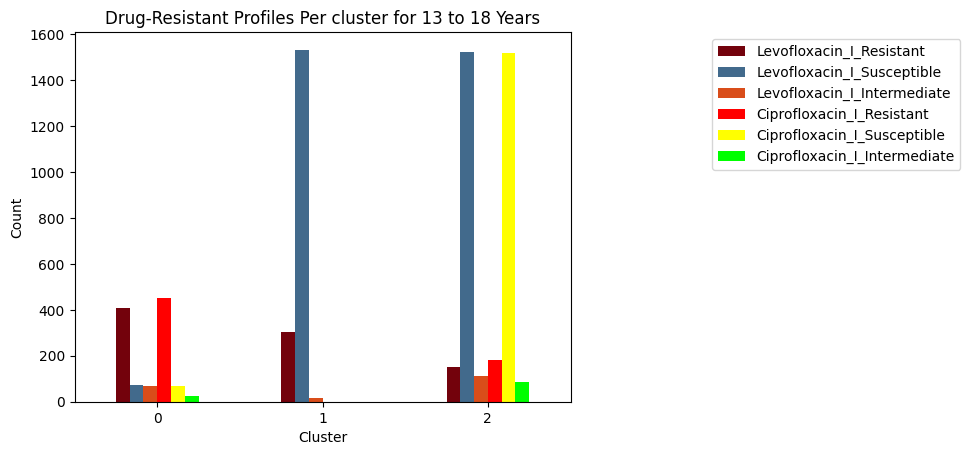

no key found
Cluster
0    35302
1    37569
2    88479
dtype: int64


<Figure size 8000x5000 with 0 Axes>

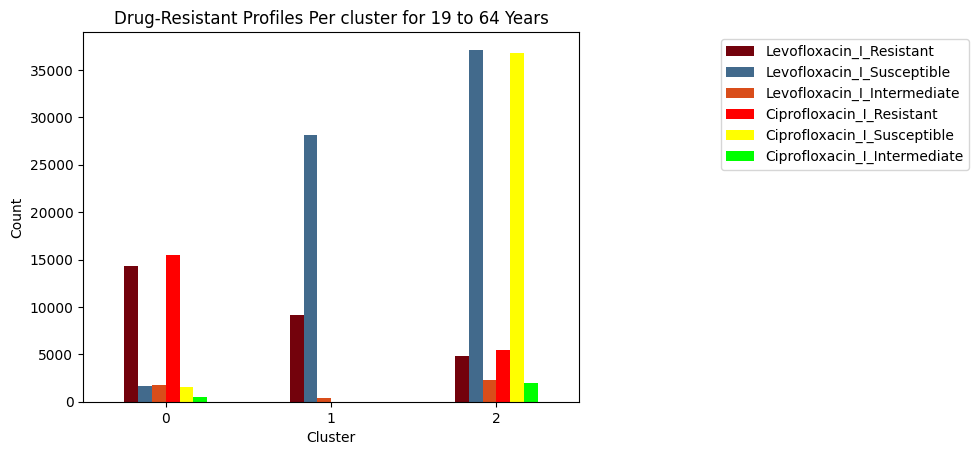

no key found
Cluster
0    1707
1    4151
2    6552
dtype: int64


<Figure size 8000x5000 with 0 Axes>

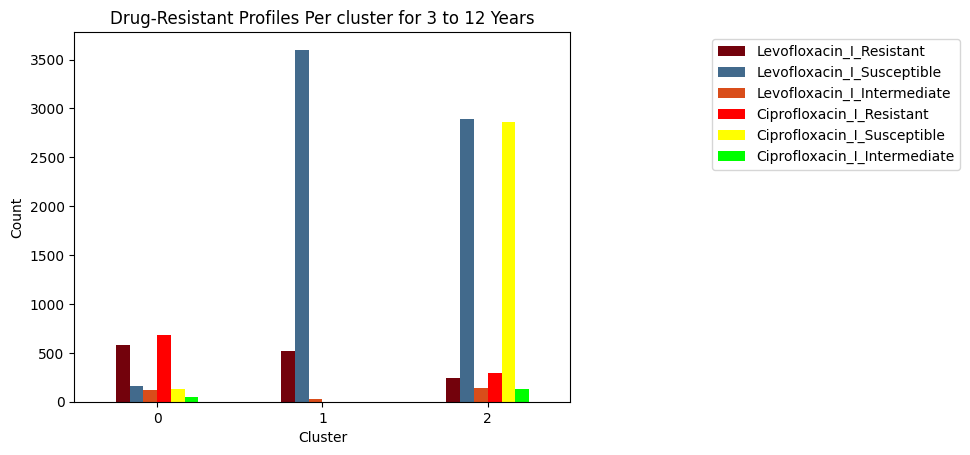

no key found
Cluster
0    26130
1    24232
2    77304
dtype: int64


<Figure size 8000x5000 with 0 Axes>

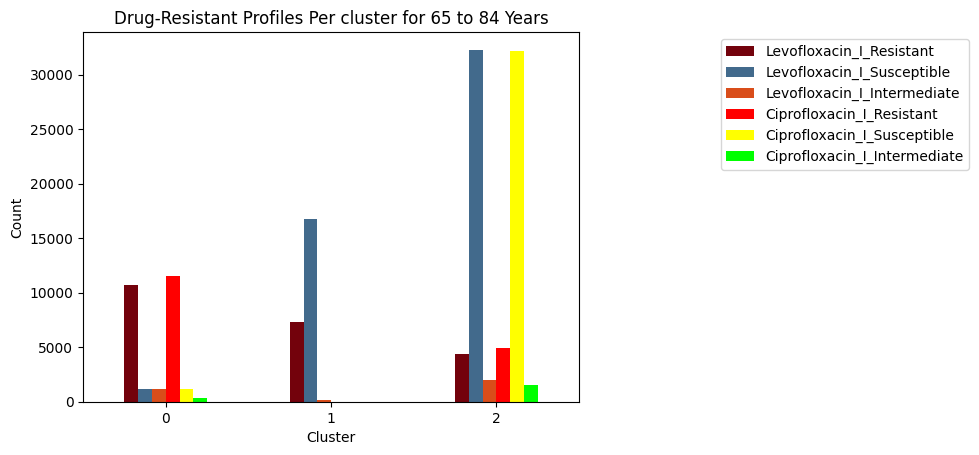

no key found
Cluster
0     4453
1     4887
2    17414
dtype: int64


<Figure size 8000x5000 with 0 Axes>

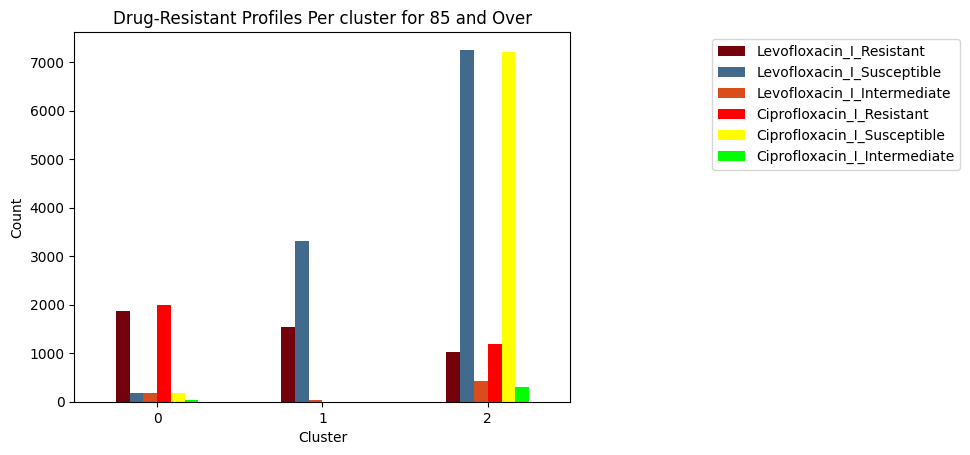

no key found
Cluster
0     999
1     952
2    2512
dtype: int64


<Figure size 8000x5000 with 0 Axes>

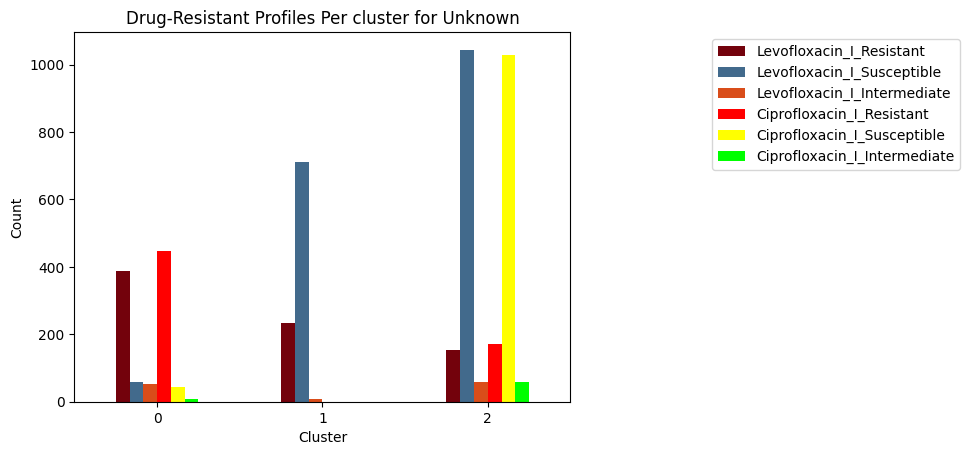

no key found


In [107]:
# List of drugs with resistance, susceptible, and intermediate profiles
drugs_list = ['Levofloxacin', 'Ciprofloxacin']
# Drug Visualization from each continent
for continent, continent_data in df_age.items():
  # print(f"Continent: {continent}")
  # print(continent_data.shape)
  Resistance_Visualization(drugs_list, continent_data,continent)

Cluster
0    2188
1    5284
2    8163
dtype: int64


<Figure size 8000x5000 with 0 Axes>

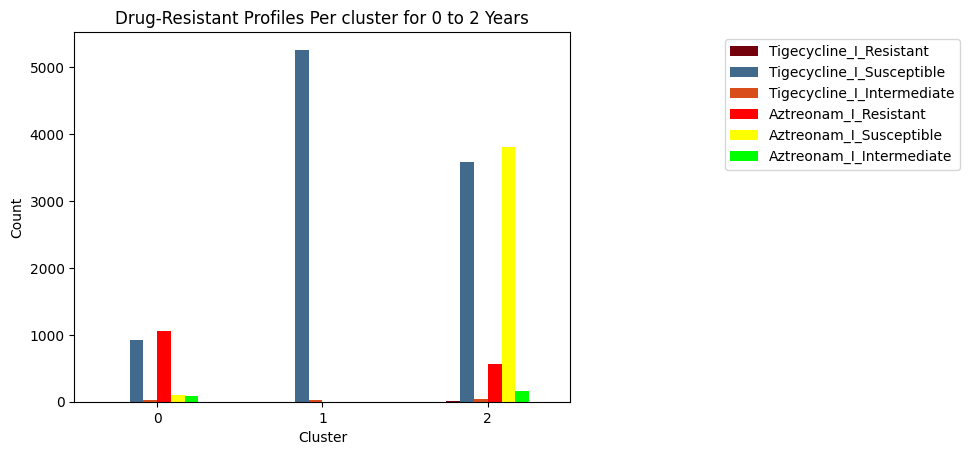

no key found
Cluster
0     653
1    1936
2    2667
dtype: int64


<Figure size 8000x5000 with 0 Axes>

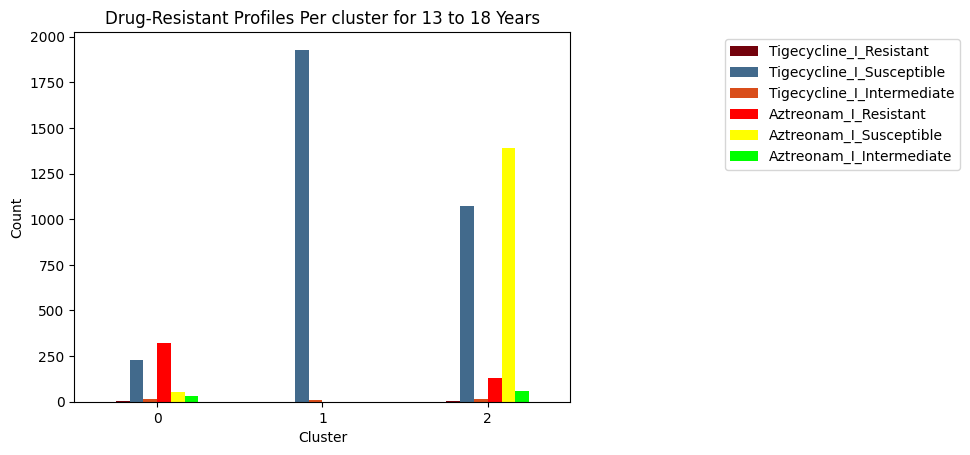

no key found
Cluster
0    20668
1    39261
2    70134
dtype: int64


<Figure size 8000x5000 with 0 Axes>

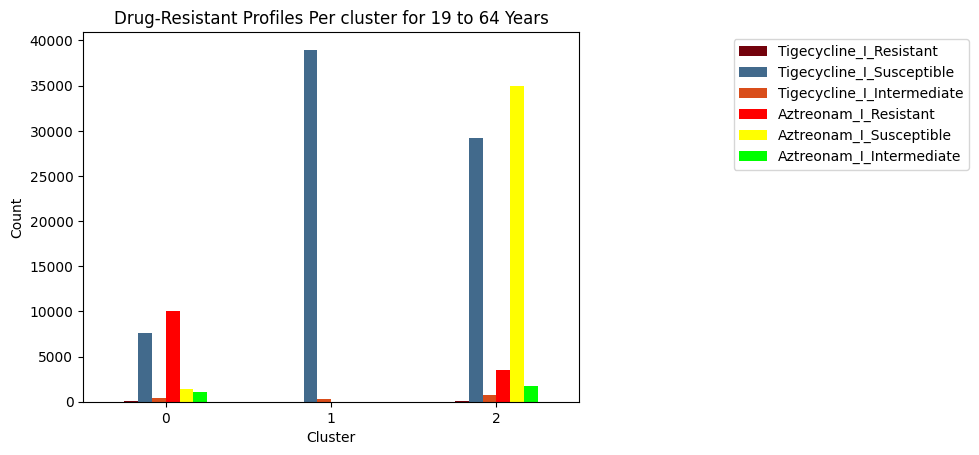

no key found
Cluster
0    1116
1    4281
2    4794
dtype: int64


<Figure size 8000x5000 with 0 Axes>

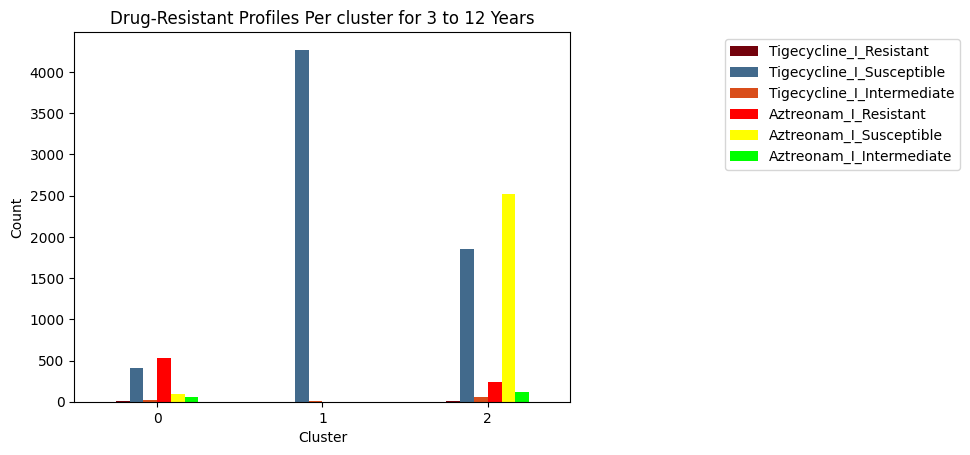

no key found
Cluster
0    15704
1    25730
2    62543
dtype: int64


<Figure size 8000x5000 with 0 Axes>

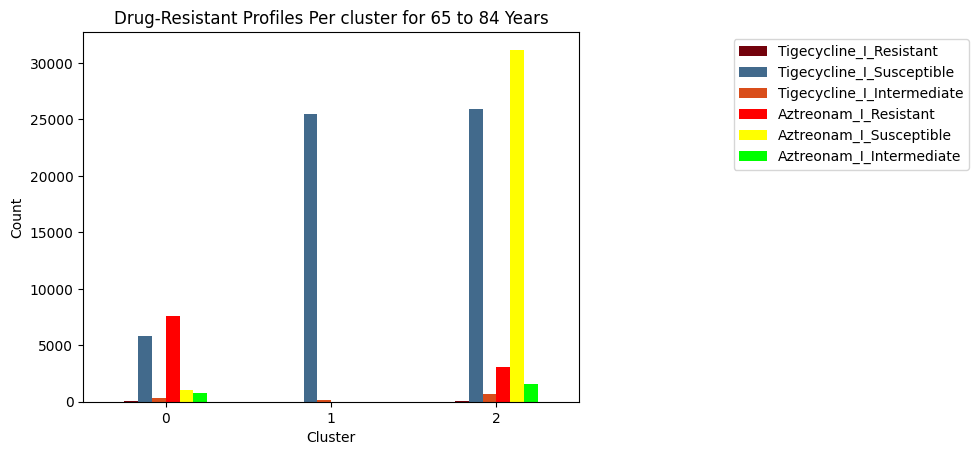

no key found
Cluster
0     2632
1     5293
2    14293
dtype: int64


<Figure size 8000x5000 with 0 Axes>

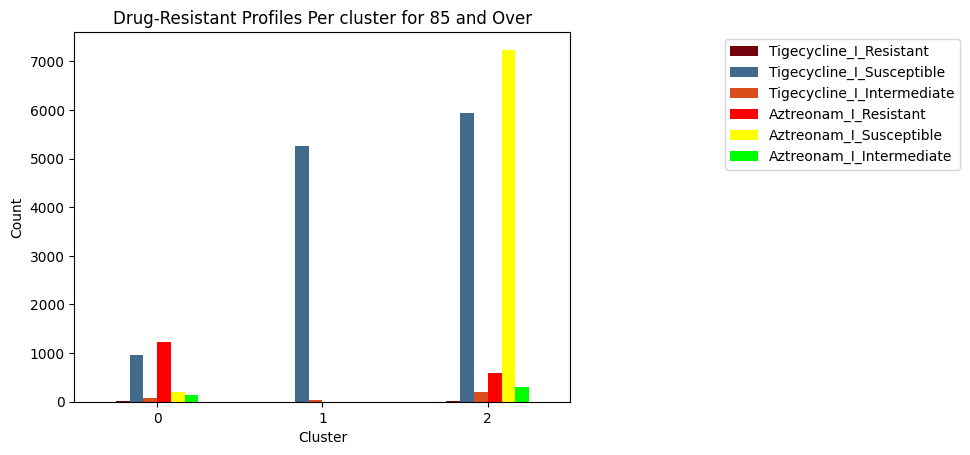

no key found
Cluster
0     586
1     992
2    2064
dtype: int64


<Figure size 8000x5000 with 0 Axes>

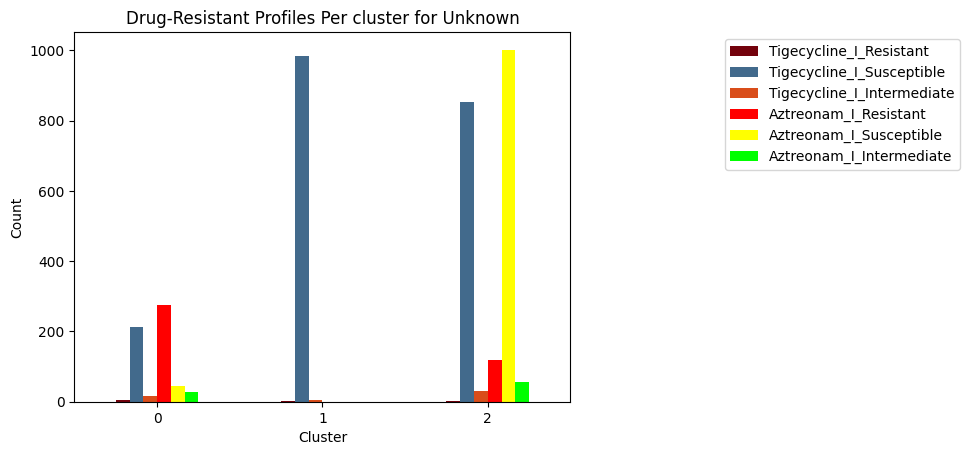

no key found


In [108]:
# Others
# List of drugs with resistance, susceptible, and intermediate profiles
drugs_list_others = ['Tigecycline',"Aztreonam"]
# Drug Visualization from each continent
for continent, continent_data in df_age.items():
  # print(f"Continent: {continent}")
  # print(continent_data.shape)
  Resistance_Visualization(drugs_list_others, continent_data,continent)